# Task

You have raw sales data of some FMCG brand. You have info on number of items sold, initial pricing, discount amount, channels where item was sold, kind of user the item was sold to.

You also have data on brand's media activity over the same period of time.

Your task is to review the data and make some analysis of sales performance & media strategy.

### Sales:

1. Make a dataset from raw sales data, include all variables you consider important.

2. Analyze sales: sales dynamics, potential seasonality, sales channels split etc.

3. Analyze pricing: compare full price vs discounted price, show how it changed over time .

4. Show some descriptive analysis for the dataset made: sum/average (whatever is applicable) by years, growth rates (analyse how sums/avgs change over time), correlations between variables (please think correlation analysis between which variables makes sense).

5. Show in a couple of slides your findings.

### Media:

1. Show how media activity evolves over time --i.e. how do number of impressions change, do they increase/decrease/remain stable?

2. Show how channels decomposition vary over time -- how does split in % within media channels change?


### Optional: ML part

1. Build a regression model with sales as dependent variable. Include all variables you consider to be appropriate for the model.

2. Analyze model results: which variables have significant impact? Which variables have most effect on sales?

3. How much of variation is described by the model?

4. Could you think of any other variables that could improve model performance?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [3]:
direct = r"/content/drive/MyDrive/Colab Notebooks/PG Data Science Test task.xlsx"
names = ["raw sales data", "media data"]

xlsx = pd.ExcelFile(direct)

## Зведення таблиць, аналіз

In [29]:
df_sales = xlsx.parse(names[0])
df_sales

,Item_purchased_count,Price_initial,Discount,Sales_channel,date,Day,week_of_sale,Week,Month,Year
0,1,69.0,40.0,Digital,2022-01-01,6,2022-01-02,52.0,1.0,2021.0
1,1,69.0,20.0,Indirect Retail,2022-01-01,6,2022-01-02,52.0,1.0,2021.0
2,1,69.0,0.0,Indirect Retail,2022-01-01,6,2022-01-02,52.0,1.0,2021.0
3,1,69.0,40.0,Digital,2022-01-01,6,2022-01-02,52.0,1.0,2021.0
4,1,69.0,40.0,Digital,2022-01-01,6,2022-01-02,52.0,1.0,2021.0
...,...,...,...,...,...,...,...,...,...,...
607342,1,69.0,15.0,Brand Retail,2024-05-05,7,2024-05-05,NaN,NaN,NaN
607343,1,0.0,0.0,Digital,2024-05-05,7,2024-05-05,NaN,NaN,NaN
607344,1,39.0,0.0,Brand Retail,2024-05-05,7,2024-05-05,NaN,NaN,NaN
607345,1,39.0,0.0,Brand Retail,2024-05-05,7,2024-05-05,NaN,NaN,NaN


In [5]:
df_media = xlsx.parse(names[1])
df_media

,year,PIVOT_DATE,Row Labels,Audio,Branded Content,Display,VOL,Grand Total,Unnamed: 8,please refer to data inputs as number of impresssions on respective date
0,2022,2022-03-05,2022-03-05,0,0.0,0,0,0.0,NaN,NaN
1,2022,2022-03-06,2022-03-06,0,0.0,0,0,0.0,NaN,NaN
2,2022,2022-03-07,2022-03-07,0,0.0,782908,223676,1006584.0,NaN,NaN
3,2022,2022-03-08,2022-03-08,0,0.0,876693,257536,1134229.0,NaN,NaN
4,2022,2022-03-09,2022-03-09,0,0.0,825995,288882,1114877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
802,2024,2024-05-15,2024-05-15,0,0.0,6964349,137918,7102267.0,NaN,NaN
803,2024,2024-05-16,2024-05-16,0,0.0,6659207,122387,6781594.0,NaN,NaN
804,2024,2024-05-17,2024-05-17,0,0.0,7088168,117408,7205576.0,NaN,NaN
805,2024,2024-05-18,2024-05-18,0,0.0,7231196,95095,7326291.0,NaN,NaN


In [5]:
df_sales.info()
df_media.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607347 entries, 0 to 607346
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Item_purchased_count  607347 non-null  int64         
 1   Price_initial         591526 non-null  float64       
 2   Discount              591526 non-null  float64       
 3   Sales_channel         606945 non-null  object        
 4   date                  607347 non-null  datetime64[ns]
 5   Day                   607347 non-null  int64         
 6   week_of_sale          607347 non-null  datetime64[ns]
 7   Week                  601257 non-null  float64       
 8   Month                 601257 non-null  float64       
 9   Year                  601257 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 46.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 10 colu

In [6]:
df_sales.describe()

,Item_purchased_count,Price_initial,Discount,date,Day,week_of_sale,Week,Month,Year
count,607347.0,591526.000000,591526.000000,607347,607347.000000,607347,601257.000000,601257.000000,601257.000000
mean,1.0,53.380632,15.864163,2023-02-28 04:39:44.600566528,3.466340,2023-03-03 17:28:12.853014528,23.810139,5.900826,2022.699855
min,1.0,-10.000000,0.000000,2022-01-01 00:00:00,1.000000,2022-01-02 00:00:00,1.000000,1.000000,2021.000000
25%,1.0,39.000000,5.000000,2022-08-16 00:00:00,2.000000,2022-08-21 00:00:00,11.000000,3.000000,2022.000000
50%,1.0,39.000000,19.500000,2023-03-04 00:00:00,3.000000,2023-03-05 00:00:00,22.000000,6.000000,2023.000000
75%,1.0,69.000000,20.000000,2023-08-28 00:00:00,5.000000,2023-09-03 00:00:00,36.000000,9.000000,2023.000000
max,1.0,338.000000,120.000000,2024-05-05 00:00:00,7.000000,2024-05-05 00:00:00,52.000000,12.000000,2024.000000
std,0.0,17.245253,12.968674,NaN,1.734987,NaN,14.660576,3.363323,0.674252


In [7]:
df_media.describe()

,year,PIVOT_DATE,Audio,Branded Content,Display,VOL,Grand Total,Unnamed: 8,please refer to data inputs as number of impresssions on respective date
count,807.000000,807,807.000000,8.070000e+02,8.070000e+02,8.070000e+02,8.070000e+02,0.0,0.0
mean,2022.799257,2023-04-12 00:00:00,3343.141264,5.035343e+04,1.826132e+06,2.461769e+05,2.126006e+06,NaN,NaN
min,2022.000000,2022-03-05 00:00:00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,2022.000000,2022-09-22 12:00:00,0.000000,0.000000e+00,1.544425e+05,0.000000e+00,1.658810e+05,NaN,NaN
50%,2023.000000,2023-04-12 00:00:00,0.000000,0.000000e+00,1.158055e+06,8.595700e+04,1.471017e+06,NaN,NaN
75%,2023.000000,2023-10-30 12:00:00,0.000000,0.000000e+00,2.214638e+06,3.856940e+05,2.737466e+06,NaN,NaN
max,2024.000000,2024-05-19 00:00:00,56858.000000,2.447571e+06,1.830836e+07,4.362849e+06,1.864485e+07,NaN,NaN
std,0.712769,NaN,11910.488355,2.561132e+05,2.626213e+06,4.193490e+05,2.775548e+06,NaN,NaN




---



## Sales

## 1. Make a dataset from raw sales data, include all variables you consider important.

In [8]:
df_new = df_sales[["Item_purchased_count", "Price_initial", "Discount", "Sales_channel", "date", "Day", "Month"]]
df_new

,Item_purchased_count,Price_initial,Discount,Sales_channel,date,Day,Month
0,1,69.0,40.0,Digital,2022-01-01,6,1.0
1,1,69.0,20.0,Indirect Retail,2022-01-01,6,1.0
2,1,69.0,0.0,Indirect Retail,2022-01-01,6,1.0
3,1,69.0,40.0,Digital,2022-01-01,6,1.0
4,1,69.0,40.0,Digital,2022-01-01,6,1.0
...,...,...,...,...,...,...,...
607342,1,69.0,15.0,Brand Retail,2024-05-05,7,NaN
607343,1,0.0,0.0,Digital,2024-05-05,7,NaN
607344,1,39.0,0.0,Brand Retail,2024-05-05,7,NaN
607345,1,39.0,0.0,Brand Retail,2024-05-05,7,NaN


В принципі, можна обійтися і без останніх двох колонок, бо ця інформація міститься в колонці date. Плюс ще й те, що "Month" містить в собі значення NaN. В такому разі можна або замінити ці значення на правильні або прибрати дану колонку та використовувати модуль datetime, якщо буде потрібною дана інформація.

In [9]:
df_new = df_new.drop(columns=["Month"], axis=1)
df_new

,Item_purchased_count,Price_initial,Discount,Sales_channel,date,Day
0,1,69.0,40.0,Digital,2022-01-01,6
1,1,69.0,20.0,Indirect Retail,2022-01-01,6
2,1,69.0,0.0,Indirect Retail,2022-01-01,6
3,1,69.0,40.0,Digital,2022-01-01,6
4,1,69.0,40.0,Digital,2022-01-01,6
...,...,...,...,...,...,...
607342,1,69.0,15.0,Brand Retail,2024-05-05,7
607343,1,0.0,0.0,Digital,2024-05-05,7
607344,1,39.0,0.0,Brand Retail,2024-05-05,7
607345,1,39.0,0.0,Brand Retail,2024-05-05,7


In [10]:
df_new["Item_purchased_count"].unique()

array([1])

In [11]:
df_sales["Sales_channel"].unique()

array(['Digital', 'Indirect Retail', 'Brand Retail', 'Remote Coach',
       'Events', 'Community Activator', nan], dtype=object)

In [12]:
df_new["Sales_channel"].value_counts()

,count
Sales_channel,
Indirect Retail,436256
Brand Retail,80214
Digital,63251
Community Activator,19666
Remote Coach,6719
Events,839


In [13]:
df_new.isnull().sum()

,0
Item_purchased_count,0
Price_initial,15821
Discount,15821
Sales_channel,402
date,0
Day,0


In [14]:
df_new[df_new["Sales_channel"].isnull()]

,Item_purchased_count,Price_initial,Discount,Sales_channel,date,Day
94124,1,39.0,20.0,NaN,2022-06-03,5
94228,1,39.0,20.0,NaN,2022-06-03,5
94718,1,39.0,20.0,NaN,2022-06-04,6
95000,1,39.0,20.0,NaN,2022-06-04,6
96543,1,39.0,20.0,NaN,2022-06-07,2
...,...,...,...,...,...,...
548594,1,69.0,0.0,NaN,2024-02-02,5
548816,1,69.0,20.0,NaN,2024-02-02,5
548861,1,69.0,20.0,NaN,2024-02-02,5
587882,1,39.0,10.0,NaN,2024-04-04,4


In [15]:
df_new.shape

(607347, 6)



---



## 2. Analyze sales: sales dynamics, potential seasonality, sales channels split etc.

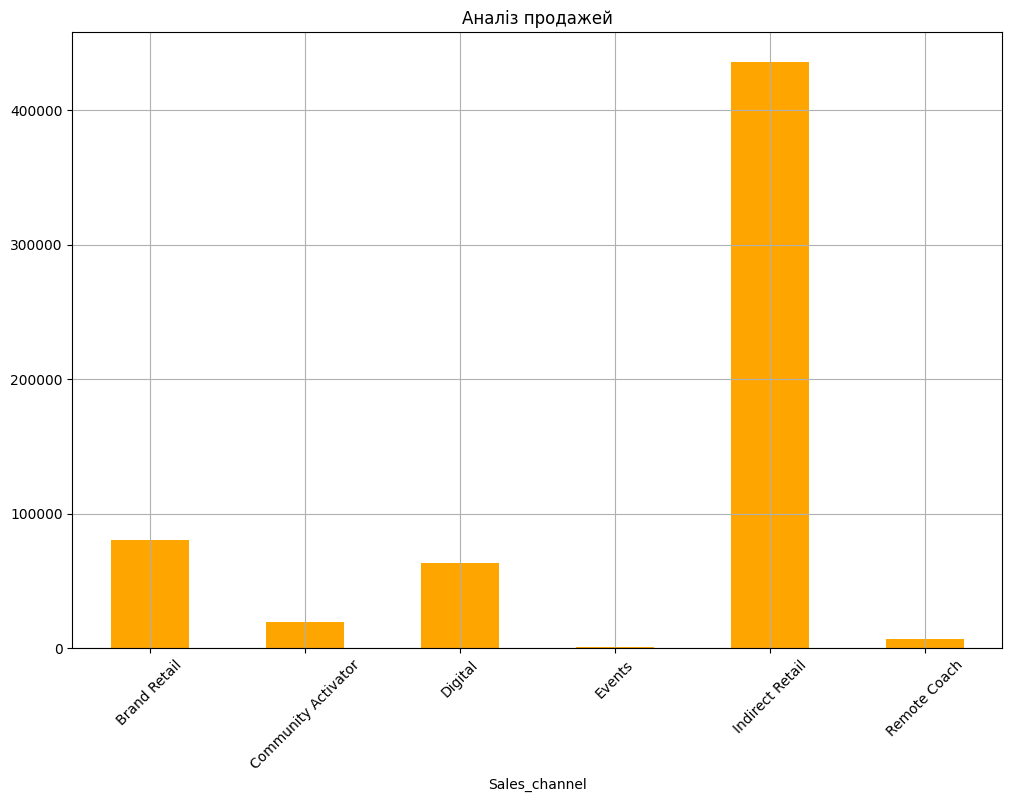

In [16]:
plt.figure(figsize=(12, 8))
df_new["Sales_channel"].value_counts().sort_index().plot(kind="bar",
                                                      title="Аналіз продажей",
                                                      color="orange")
plt.grid()
plt.xticks(rotation=45)
plt.show()

Бачимо, що найбільше продажей було на каналі через посередників.

In [17]:
df_new["Day"].value_counts().sort_index()

,count
Day,
1,102432
2,104650
3,104905
4,103531
5,109925
6,58253
7,23651


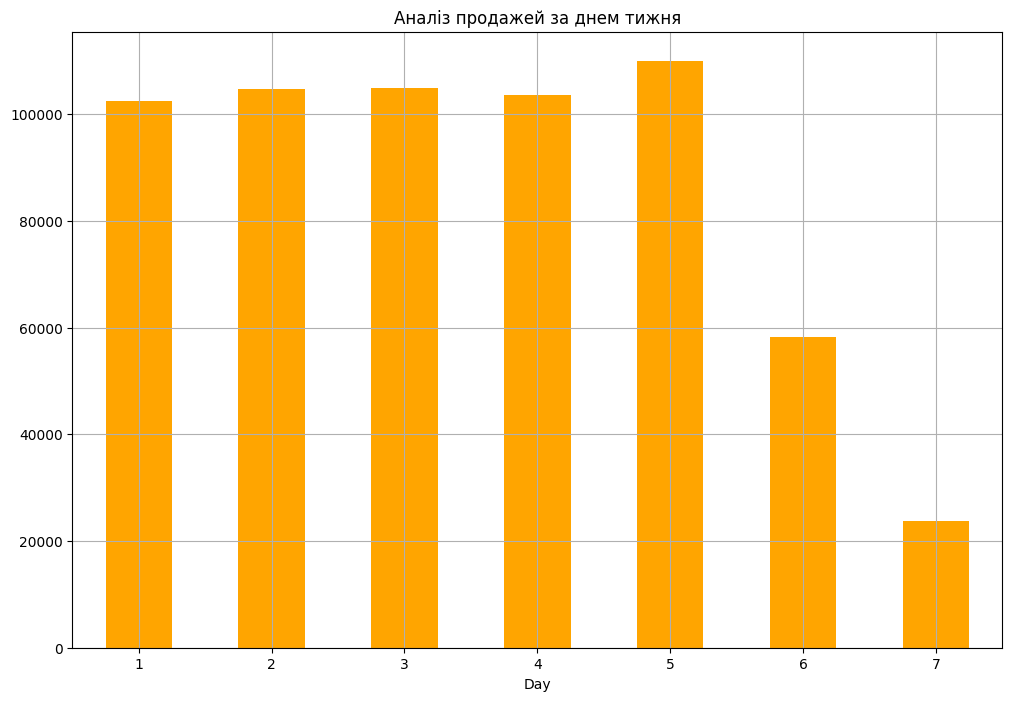

In [18]:
plt.figure(figsize=(12, 8))
df_new["Day"].value_counts().sort_index().plot(kind="bar",
                                                      title="Аналіз продажей за днем тижня",
                                                      color="orange")
plt.grid()
plt.xticks(rotation=360)
plt.show()

З чого можна зробити висновок, що на вихідних продажей майже вдвоє менше.

In [19]:
df_new[(df_new["Price_initial"].isnull()) & (df_new["Discount"].isnull())]

,Item_purchased_count,Price_initial,Discount,Sales_channel,date,Day
2710,1,NaN,NaN,Digital,2022-01-10,1
2733,1,NaN,NaN,Digital,2022-01-10,1
2734,1,NaN,NaN,Digital,2022-01-10,1
2755,1,NaN,NaN,Digital,2022-01-10,1
2802,1,NaN,NaN,Digital,2022-01-10,1
...,...,...,...,...,...,...
605515,1,NaN,NaN,Digital,2024-05-01,3
605601,1,NaN,NaN,Digital,2024-05-02,4
605920,1,NaN,NaN,Digital,2024-05-02,4
606358,1,NaN,NaN,Digital,2024-05-03,5


In [20]:
df_new[(df_new["Price_initial"].isnull()) & (df_new["Discount"].isnull())]["Sales_channel"].unique()

array(['Digital'], dtype=object)

Можна прибрати інформацію з NaN.

In [21]:
to_drop = df_new[(df_new["Price_initial"].isnull()) & (df_new["Discount"].isnull())]

In [22]:
df_new.drop(to_drop.index, inplace=True)

In [23]:
df_new.isnull().sum()

,0
Item_purchased_count,0
Price_initial,0
Discount,0
Sales_channel,402
date,0
Day,0


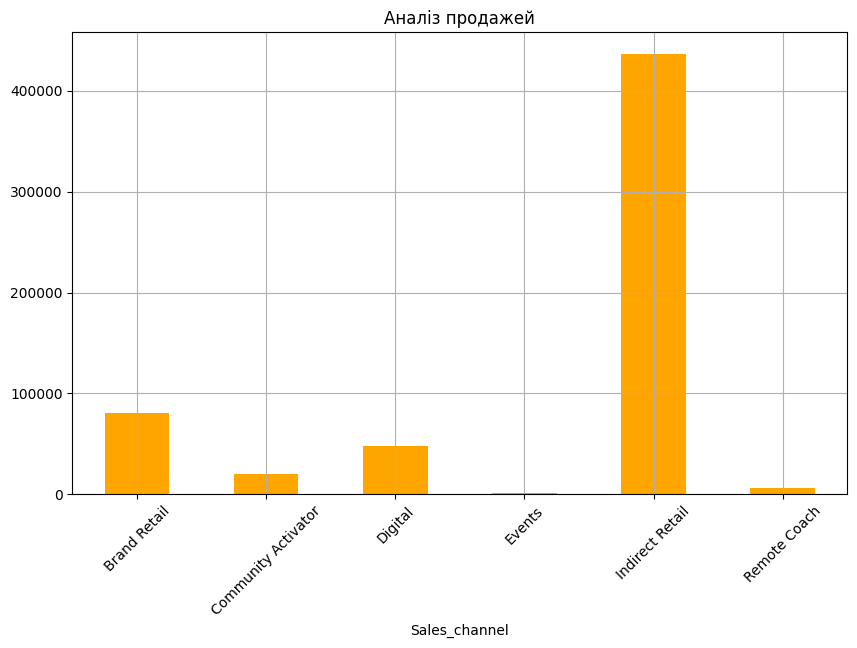

In [23]:
plt.figure(figsize=(10, 6))
df_new["Sales_channel"].value_counts().sort_index().plot(kind="bar",
                                                      title="Аналіз продажей",
                                                      color="orange")
plt.grid()
plt.xticks(rotation=45)
plt.show()

## Основна таблиця продаж

In [24]:
sales = df_new.groupby("date").agg({
    "Item_purchased_count": "sum",
    "Price_initial": "sum",
    "Discount": "sum"
}).reset_index()
sales

,date,Item_purchased_count,Price_initial,Discount
0,2022-01-01,38,2622.0,760.00
1,2022-01-02,160,11040.0,2847.60
2,2022-01-03,526,36034.0,9842.80
3,2022-01-04,510,34970.0,9370.00
4,2022-01-05,568,38912.0,10470.00
...,...,...,...,...
851,2024-05-01,113,4175.0,375.00
852,2024-05-02,659,30191.0,5386.29
853,2024-05-03,740,34417.0,6790.00
854,2024-05-04,315,14764.0,2297.00


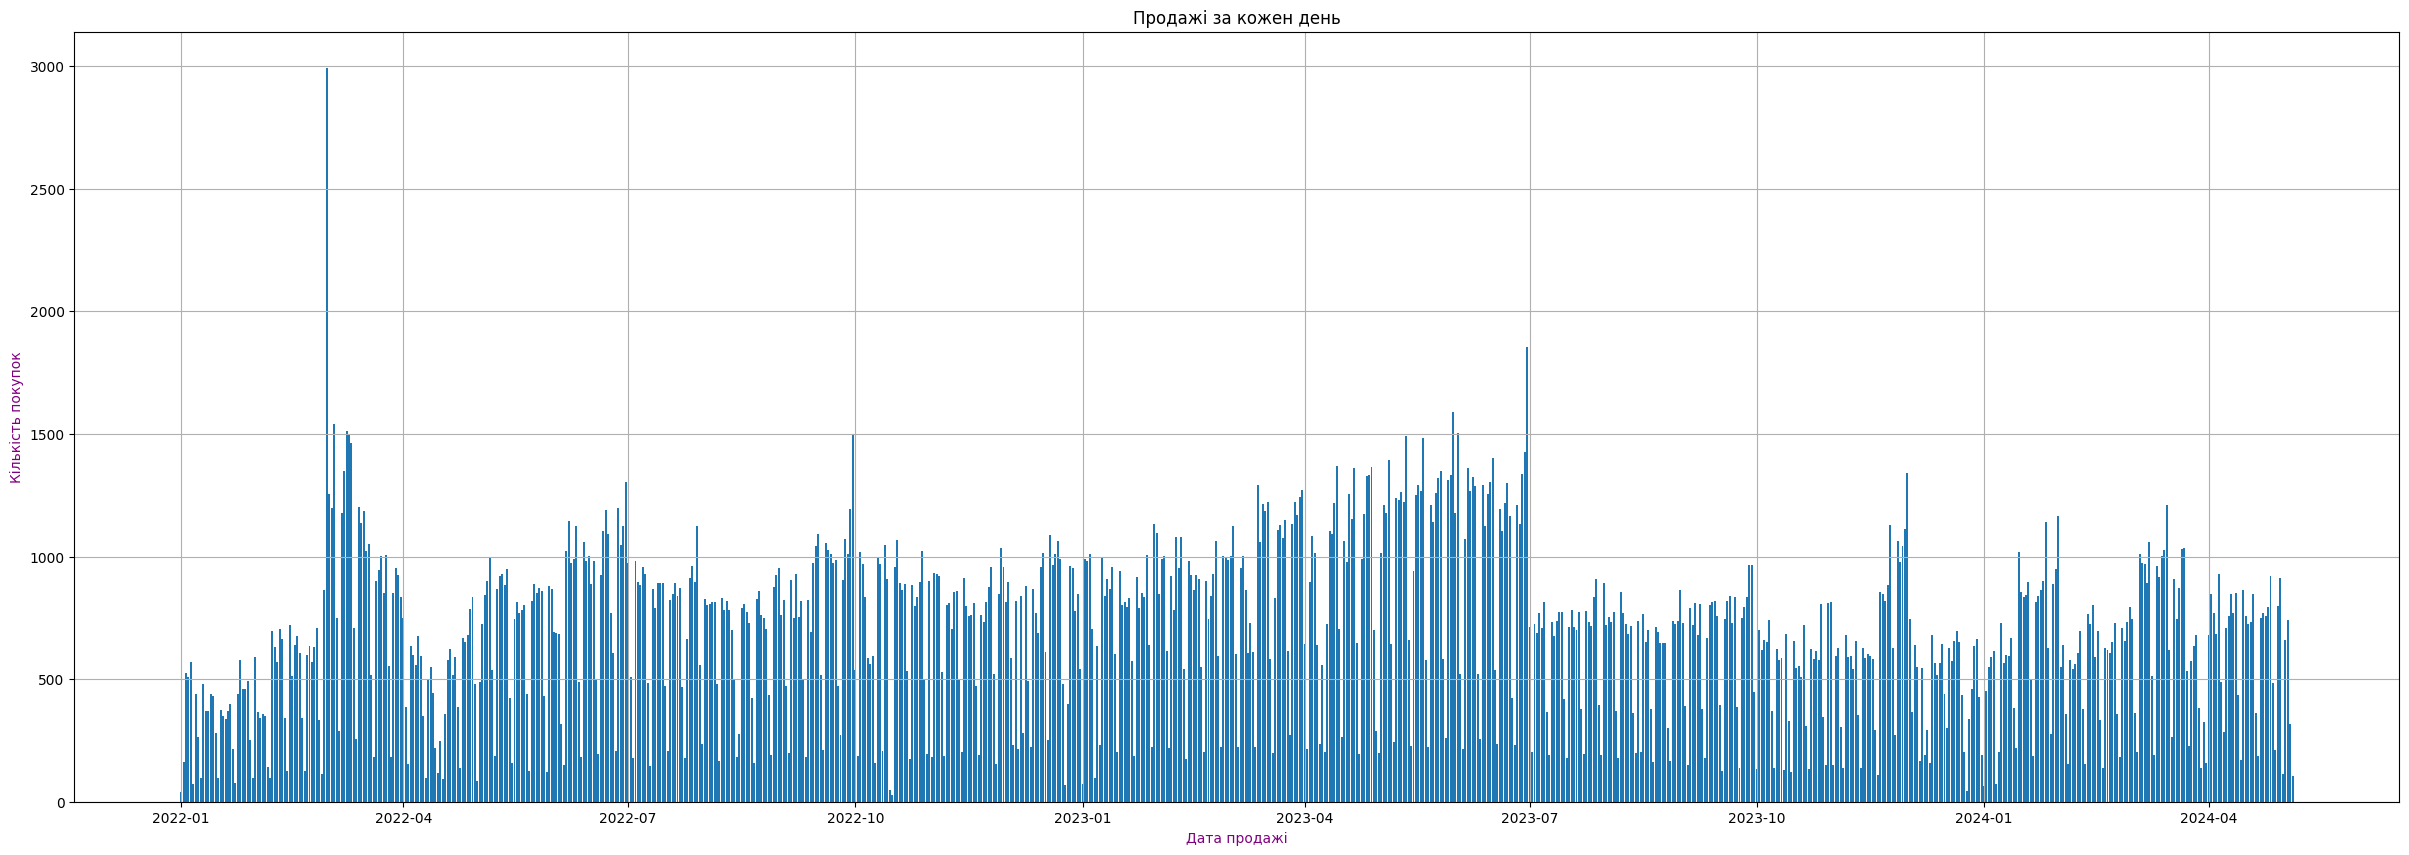

In [25]:
plt.figure(figsize=(30, 10))
plt.bar(sales["date"], sales["Item_purchased_count"])

plt.title(f"Продажі за кожен день")
plt.xlabel("Дата продажі", color="purple")
plt.ylabel("Кількість покупок", color="purple")
plt.grid()
plt.show()

Судячи з графіку можемо спостерігати сезонність і навіть тенденції. Починаючи з літа 2023 продажі різко скорочуються. Щоб детальніше розгледіти аналітику - можна вибрати певний період.

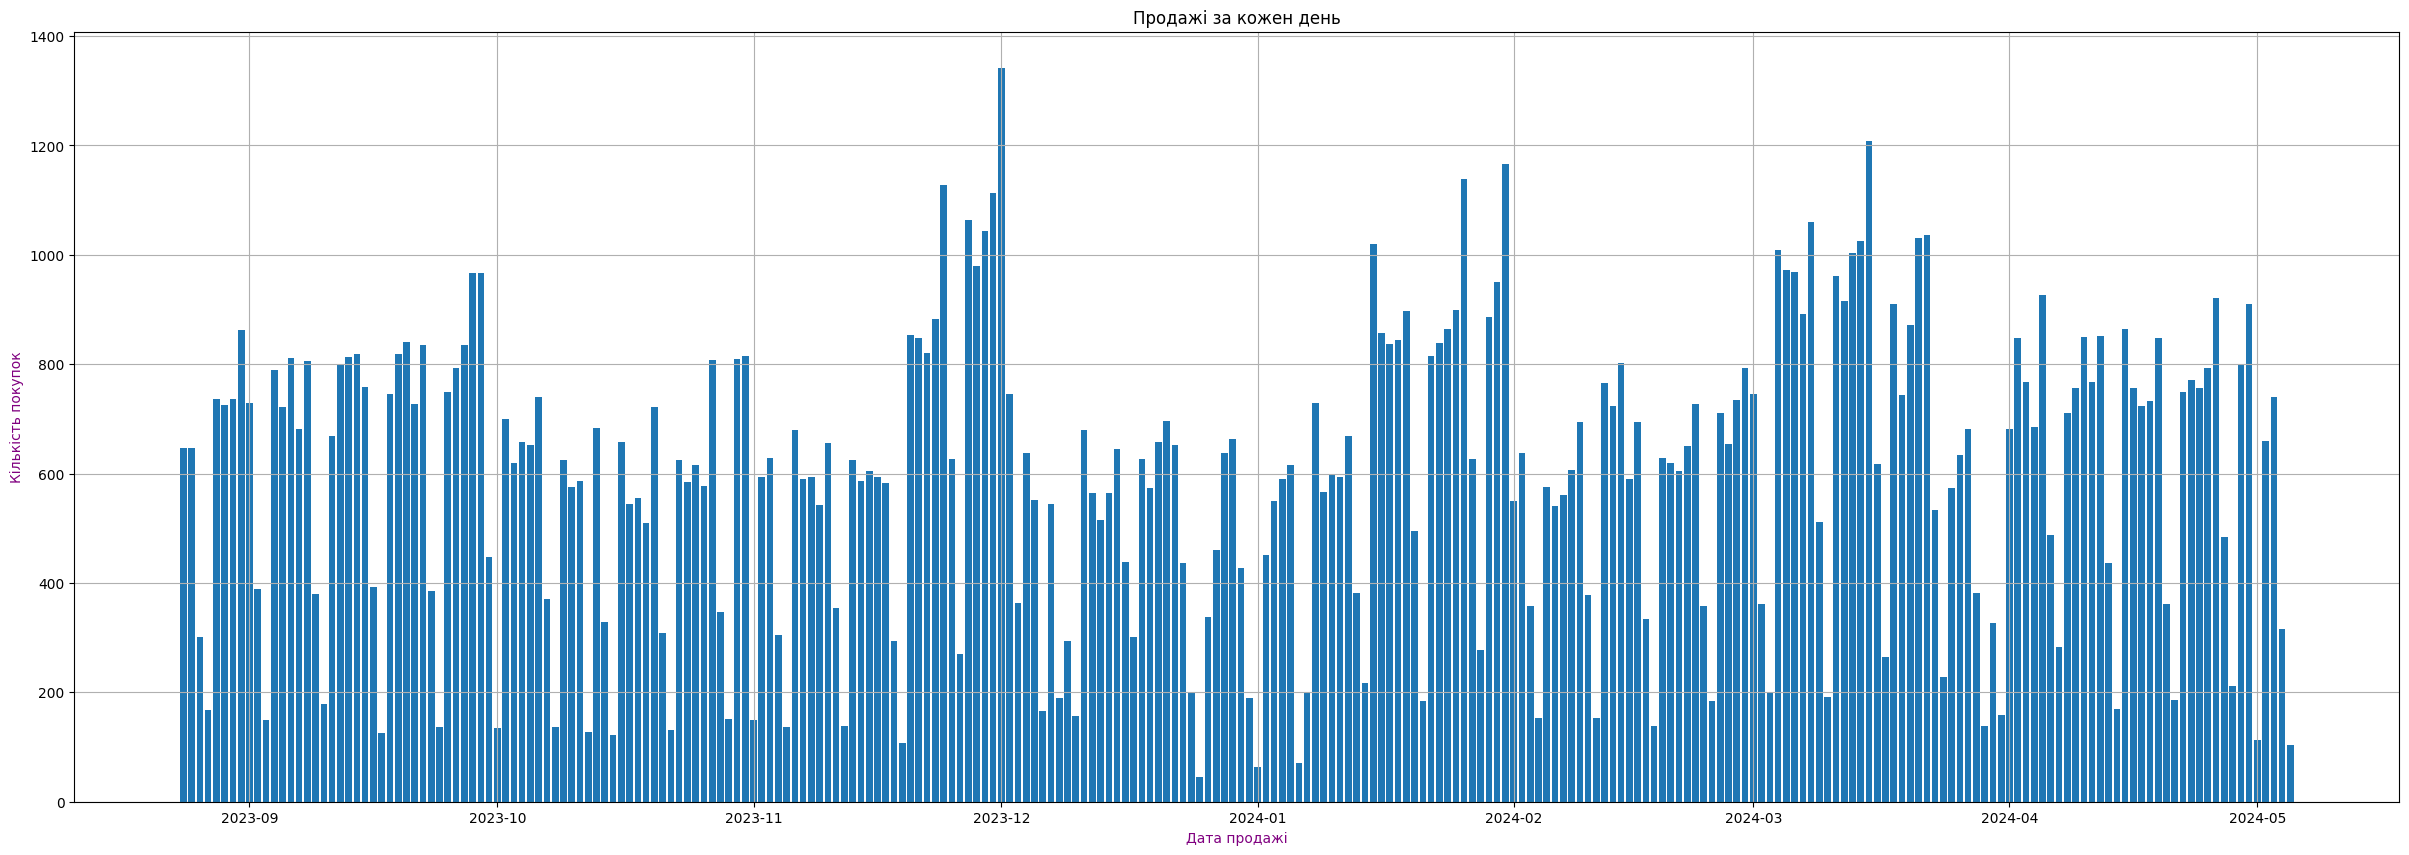

In [26]:
plt.figure(figsize=(30, 10))
plt.bar(sales["date"][600:1400], sales["Item_purchased_count"][600:1400])

plt.title(f"Продажі за кожен день")
plt.xlabel("Дата продажі", color="purple")
plt.ylabel("Кількість покупок", color="purple")
# plt.xticks(rotation=45)
plt.grid()
plt.show()

Сезонність: як вже з'ясувалось раніше, основна частина продажей приходить на будні дні.



---



## 3. Analyze pricing: compare full price vs discounted price, show how it changed over time .

Для цього використаємо таблицю sales і порівняємо виставлену ціну і "чистий" прибуток.

In [27]:
sales["Difference"] = sales["Price_initial"] - sales["Discount"]
sales

,date,Item_purchased_count,Price_initial,Discount,Difference
0,2022-01-01,38,2622.0,760.00,1862.00
1,2022-01-02,160,11040.0,2847.60,8192.40
2,2022-01-03,526,36034.0,9842.80,26191.20
3,2022-01-04,510,34970.0,9370.00,25600.00
4,2022-01-05,568,38912.0,10470.00,28442.00
...,...,...,...,...,...
851,2024-05-01,113,4175.0,375.00,3800.00
852,2024-05-02,659,30191.0,5386.29,24804.71
853,2024-05-03,740,34417.0,6790.00,27627.00
854,2024-05-04,315,14764.0,2297.00,12467.00


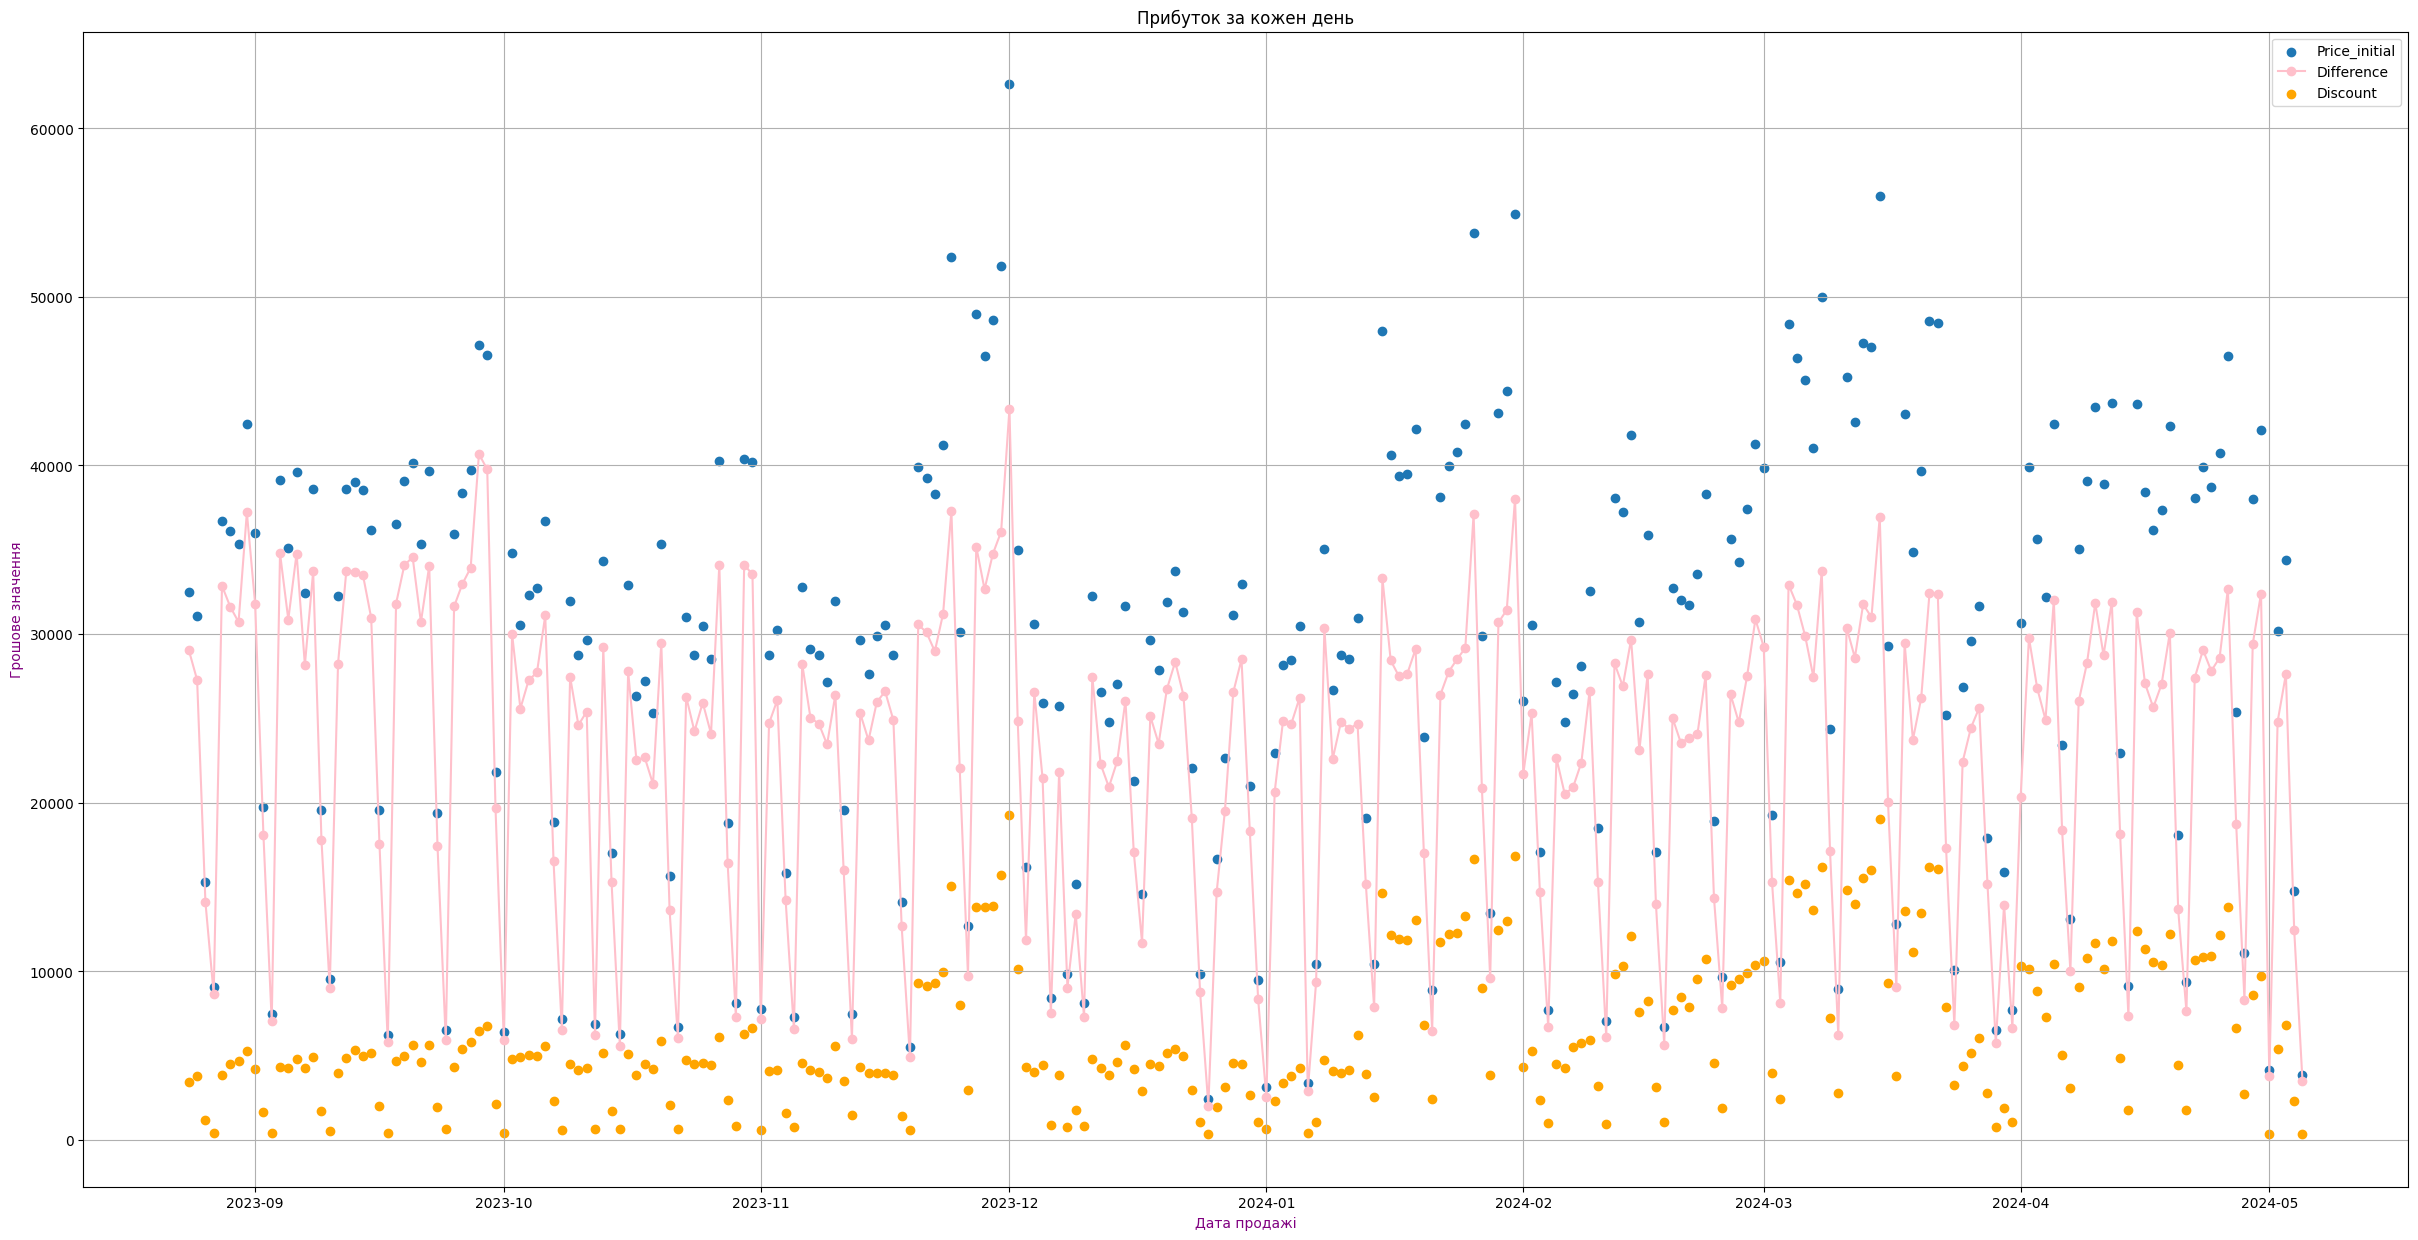

In [28]:
plt.figure(figsize=(30, 15))
plt.scatter(sales["date"][600:1400], sales["Price_initial"][600:1400], label="Price_initial")
plt.plot(sales["date"][600:1400], sales["Difference"][600:1400], color="pink", label="Difference", marker="o")
plt.scatter(sales["date"][600:1400], sales["Discount"][600:1400], color="orange", label="Discount")

plt.title(f"Прибуток за кожен день")
plt.xlabel("Дата продажі", color="purple")
plt.ylabel("Грошове значення", color="purple")

plt.legend()
plt.grid()
plt.show()

Якщо порівняти два графіки: графік кількості продаж та графік цін, то не складно помітити, що в дні, коли продавалась більша кількість товарів, прибуток також був більшим.

Графік для всього періоду:

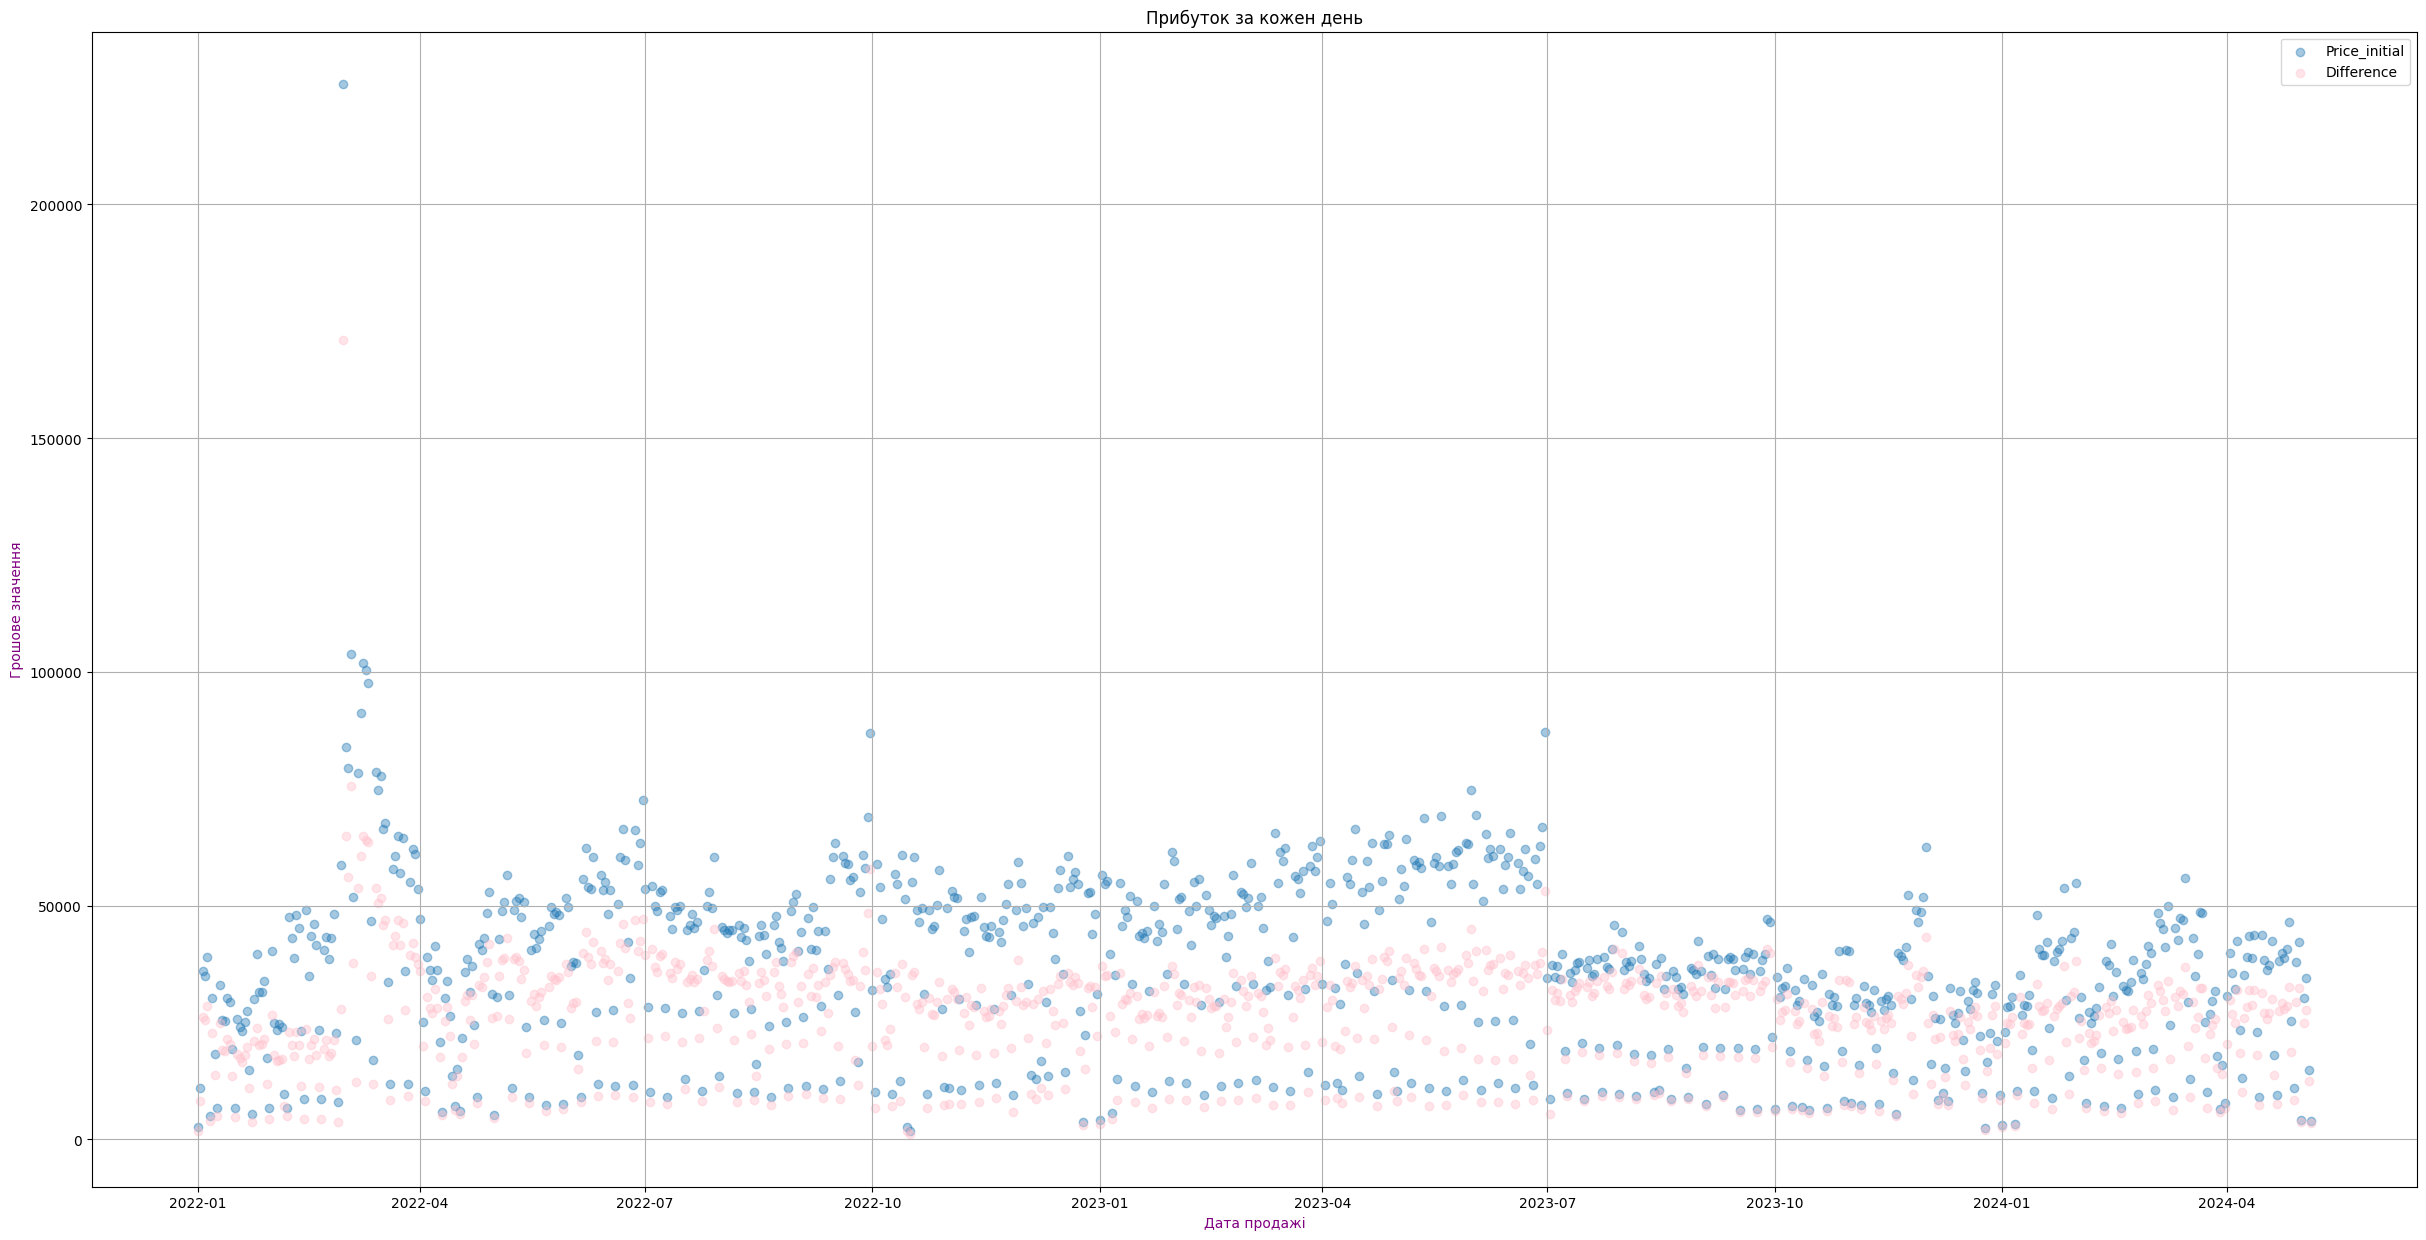

In [29]:
plt.figure(figsize=(30, 15))
plt.scatter(sales["date"], sales["Price_initial"], label="Price_initial", alpha=0.4)
plt.scatter(sales["date"], sales["Difference"], color="pink", label="Difference", alpha=0.4)
# plt.scatter(sales["date"], sales["Discount"], color="orange", label="Discount", alpha=0.4)

plt.title(f"Прибуток за кожен день")
plt.xlabel("Дата продажі", color="purple")
plt.ylabel("Грошове значення", color="purple")

plt.legend()
plt.grid()
plt.show()

Де Difference - різниця між виставленою ціною та знижкою (чистий прибуток), а Price_initial - основна виставлена ціна



---



## 4. Show some descriptive analysis for the dataset made: sum/average (whatever is applicable) by years, growth rates (analyse how sums/avgs change over time), correlations between variables (please think correlation analysis between which variables makes sense).

In [30]:
sales.describe()

,date,Item_purchased_count,Price_initial,Discount,Difference
count,856,856.000000,856.000000,856.000000,856.000000
mean,2023-03-04 12:00:00,691.035047,36887.887850,10962.692932,25925.194918
min,2022-01-01 00:00:00,29.000000,1701.000000,340.000000,1081.000000
25%,2022-08-02 18:00:00,439.000000,25082.250000,4169.625000,18416.332500
50%,2023-03-04 12:00:00,719.000000,37605.000000,9644.400000,27777.420000
75%,2023-10-04 06:00:00,910.250000,49099.500000,17390.755000,33737.325000
max,2024-05-05 00:00:00,2991.000000,225726.000000,54619.400000,171106.600000
std,NaN,345.124734,18886.140593,7994.479629,12367.552912


In [31]:
first_year = sales[sales["date"] == pd.Timestamp("2023-01-01")]
second_year = sales[sales["date"] == pd.Timestamp("2024-01-01")]
third_year = sales[sales["date"] == pd.Timestamp("2024-05-05")]

print(first_year, second_year, third_year)

          date  Item_purchased_count  Price_initial  Discount  Difference
365 2023-01-01                    71         4219.0    1050.0      3169.0           date  Item_purchased_count  Price_initial  Discount  Difference
730 2024-01-01                    64         3159.0     638.0      2521.0           date  Item_purchased_count  Price_initial  Discount  Difference
855 2024-05-05                   104         3862.0     340.0      3522.0


In [32]:
first_year = sales[:365]
second_year = sales[365:730]
third_year = sales[730:]
third_year

,date,Item_purchased_count,Price_initial,Discount,Difference
730,2024-01-01,64,3159.0,638.00,2521.00
731,2024-01-02,452,22971.0,2334.70,20636.30
732,2024-01-03,550,28197.0,3377.00,24820.00
733,2024-01-04,590,28453.0,3789.00,24664.00
734,2024-01-05,616,30460.0,4241.19,26218.81
...,...,...,...,...,...
851,2024-05-01,113,4175.0,375.00,3800.00
852,2024-05-02,659,30191.0,5386.29,24804.71
853,2024-05-03,740,34417.0,6790.00,27627.00
854,2024-05-04,315,14764.0,2297.00,12467.00


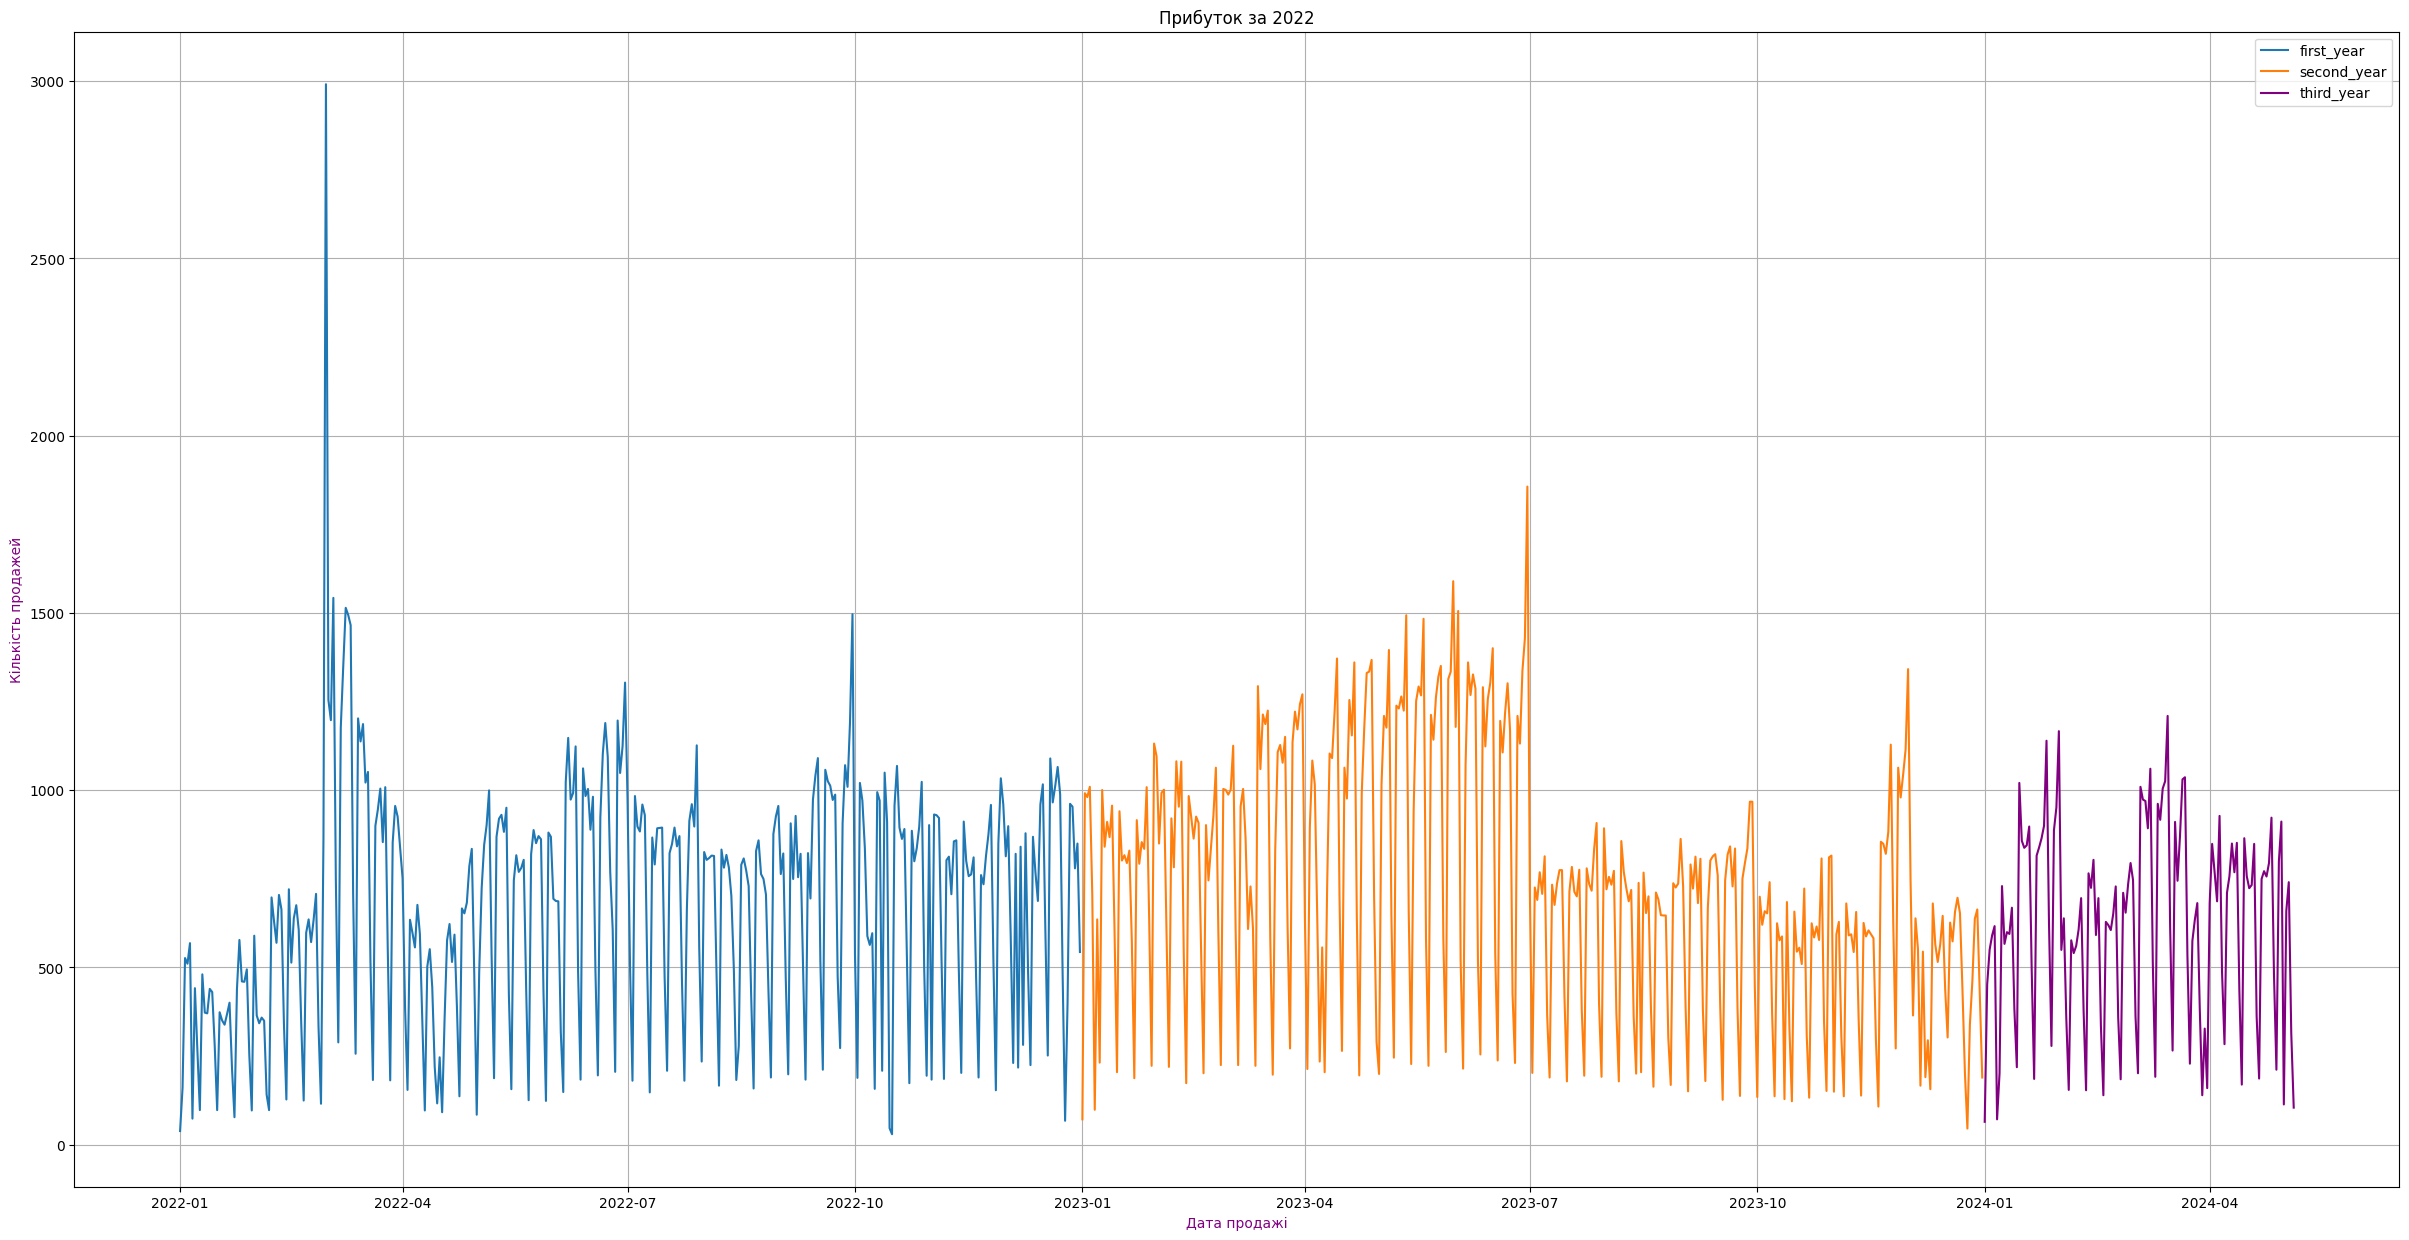

In [33]:
plt.figure(figsize=(30, 15))
plt.plot(first_year["date"], first_year["Item_purchased_count"], label="first_year")
plt.plot(second_year["date"], second_year["Item_purchased_count"], label="second_year")
plt.plot(third_year["date"], third_year["Item_purchased_count"], color="purple", label="third_year")

plt.title(f"Прибуток за 2022")
plt.xlabel("Дата продажі", color="purple")
plt.ylabel("Кількість продажей", color="purple")

plt.legend()
plt.grid()
plt.show()

На графіку ми можемо спостерігати зріст продажей протягом 2022 року. Тенденція продовжується до середини 2023, після якої відбувається різке зниження продажей, яке повільно спадає до останнього місяця року. Далі видно різкий зріст продажей (півмісяця), після якого, на кінець року, знову відбувся спад. А з початку 2024 тенденція продажей знову зростає.

In [34]:
first_year.describe()

,date,Item_purchased_count,Price_initial,Discount,Difference
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,672.123288,39657.342466,12381.925479,27275.416986
min,2022-01-01 00:00:00,29.000000,1701.000000,539.600000,1081.000000
25%,2022-04-02 00:00:00,431.000000,25657.000000,6220.000000,18527.000000
50%,2022-07-02 00:00:00,734.000000,43066.000000,11465.000000,28442.000000
75%,2022-10-01 00:00:00,899.000000,50780.000000,18110.000000,35319.000000
max,2022-12-31 00:00:00,2991.000000,225726.000000,54619.400000,171106.600000
std,NaN,346.149024,21267.592674,7776.004549,14827.490097


In [35]:
second_year.describe()

,date,Item_purchased_count,Price_initial,Discount,Difference
count,365,365.000000,365.000000,365.000000,365.000000
mean,2023-07-02 00:00:00,732.054795,36353.032877,10581.281616,25771.751260
min,2023-01-01 00:00:00,45.000000,2401.000000,366.700000,2034.300000
25%,2023-04-02 00:00:00,519.000000,25227.000000,3858.200000,18851.350000
50%,2023-07-02 00:00:00,724.000000,35950.000000,5300.000000,28570.580000
75%,2023-10-01 00:00:00,991.000000,51060.000000,19161.400000,33752.100000
max,2023-12-31 00:00:00,1856.000000,87214.000000,34077.810000,53136.190000
std,NaN,360.669131,17403.856894,8757.689280,10295.958309


In [36]:
third_year.describe()

,date,Item_purchased_count,Price_initial,Discount,Difference
count,126,126.000000,126.000000,126.000000,126.000000
mean,2024-03-03 12:00:00,626.992063,30414.642857,7956.306032,22458.336825
min,2024-01-01 00:00:00,64.000000,3159.000000,340.000000,2521.000000
25%,2024-02-01 06:00:00,395.750000,20206.250000,3922.530000,15746.997500
50%,2024-03-03 12:00:00,674.500000,32393.500000,8053.500000,24976.500000
75%,2024-04-03 18:00:00,842.500000,40448.500000,11787.040000,28982.750000
max,2024-05-05 00:00:00,1209.000000,56001.000000,19040.030000,38039.880000
std,NaN,277.335710,13232.862880,4724.335969,8933.431812


In [37]:
print("First year correlation for price and discount:\n",
      first_year["Price_initial"].corr(first_year["Discount"]),
      "\n",
      "\nSecond year correlation for price and discount:\n",
      second_year["Price_initial"].corr(second_year["Discount"]),
      "\n",
      "\nThird year correlation for price and discount:\n",
      third_year["Price_initial"].corr(third_year["Discount"]))

First year correlation for price and discount:
 0.8856203222946228 
 
Second year correlation for price and discount:
 0.897483791089808 
 
Third year correlation for price and discount:
 0.9407262489800299


In [38]:
print("First year correlation for price and purchased count:\n",
      first_year["Price_initial"].corr(first_year["Item_purchased_count"]),
      "\n",
      "\nSecond year correlation for price and purchased count:\n",
      second_year["Price_initial"].corr(second_year["Item_purchased_count"]),
      "\n",
      "\nThird year correlation for price and purchased count:\n",
      third_year["Price_initial"].corr(third_year["Item_purchased_count"]))

First year correlation for price and purchased count:
 0.9788652498605299 
 
Second year correlation for price and purchased count:
 0.9936186012369175 
 
Third year correlation for price and purchased count:
 0.9939765320577775


Визначаємо досить велику кореляцію між ціною та знижкою і між ціною та кількістю проданих товарів



---



## Media

## 1. Show how media activity evolves over time --i.e. how do number of impressions change, do they increase/decrease/remain stable?

In [39]:
df_media

,year,PIVOT_DATE,Row Labels,Audio,Branded Content,Display,VOL,Grand Total,Unnamed: 8,please refer to data inputs as number of impresssions on respective date
0,2022,2022-03-05,2022-03-05,0,0.0,0,0,0.0,NaN,NaN
1,2022,2022-03-06,2022-03-06,0,0.0,0,0,0.0,NaN,NaN
2,2022,2022-03-07,2022-03-07,0,0.0,782908,223676,1006584.0,NaN,NaN
3,2022,2022-03-08,2022-03-08,0,0.0,876693,257536,1134229.0,NaN,NaN
4,2022,2022-03-09,2022-03-09,0,0.0,825995,288882,1114877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
802,2024,2024-05-15,2024-05-15,0,0.0,6964349,137918,7102267.0,NaN,NaN
803,2024,2024-05-16,2024-05-16,0,0.0,6659207,122387,6781594.0,NaN,NaN
804,2024,2024-05-17,2024-05-17,0,0.0,7088168,117408,7205576.0,NaN,NaN
805,2024,2024-05-18,2024-05-18,0,0.0,7231196,95095,7326291.0,NaN,NaN


In [40]:
df_media.isnull().sum()

,0
year,0
PIVOT_DATE,0
Row Labels,0
Audio,0
Branded Content,0
Display,0
VOL,0
Grand Total,0
Unnamed: 8,807
please refer to data inputs as number of impresssions on respective date,807


In [41]:
df_media["Audio"].unique()

array([    0, 29224, 49854, 51288, 49978, 48736, 49749, 48996, 48412,
       48207, 48926, 48311, 47711, 47314, 47448, 46752, 46349, 45361,
       40444, 40854, 42305, 38683, 40900, 38343, 36985, 37544, 38971,
       39596, 39063, 33333, 40573, 56858, 45740, 45656, 49822, 51577,
       46793, 51099, 49451, 49449, 47115, 49557, 51727, 45867, 46477,
       47485, 46773, 47087, 48060, 45959, 47935, 46865, 44492, 45238,
       46338, 45056, 45403, 42770, 40852, 40057, 20100,    39,     7,
           1])

In [42]:
df_media["Branded Content"].unique()

array([0.00000000e+00, 7.00000000e+03, 5.00000000e+03, 3.00000000e+03,
       2.00000000e+03, 2.40000000e+04, 3.30000000e+04, 4.70000000e+04,
       4.00000000e+04, 5.20000000e+04, 7.20000000e+04, 9.70020000e+04,
       9.24000000e+05, 9.49000000e+05, 7.40000000e+05, 8.81000000e+05,
       7.59417000e+05, 9.21310000e+05, 1.15684700e+06, 8.73095000e+05,
       7.34559000e+05, 7.65049000e+05, 9.99584000e+05, 8.14306000e+05,
       8.99523000e+05, 6.53120000e+05, 8.34617000e+05, 8.78812000e+05,
       7.95664000e+05, 8.64003000e+05, 6.95382000e+05, 6.52000000e+05,
       8.26000000e+05, 7.00000000e+05, 6.36000000e+05, 7.15000000e+05,
       6.70000000e+05, 1.13200000e+06, 1.00100000e+06, 6.10000000e+05,
       5.28000000e+05, 6.71000000e+05, 1.00000000e+03, 4.00000000e+03,
       6.00000000e+03, 4.71400000e+03, 3.42857000e+05, 1.69500000e+06,
       2.44757100e+06, 2.04014300e+06, 2.34314300e+06, 2.10014300e+06,
       2.35771400e+06, 2.44571400e+06, 1.24290000e+04, 2.60000000e+04,
      

In [43]:
media = df_media[["PIVOT_DATE", "Audio", "Branded Content", "Display", "VOL", "Grand Total"]]

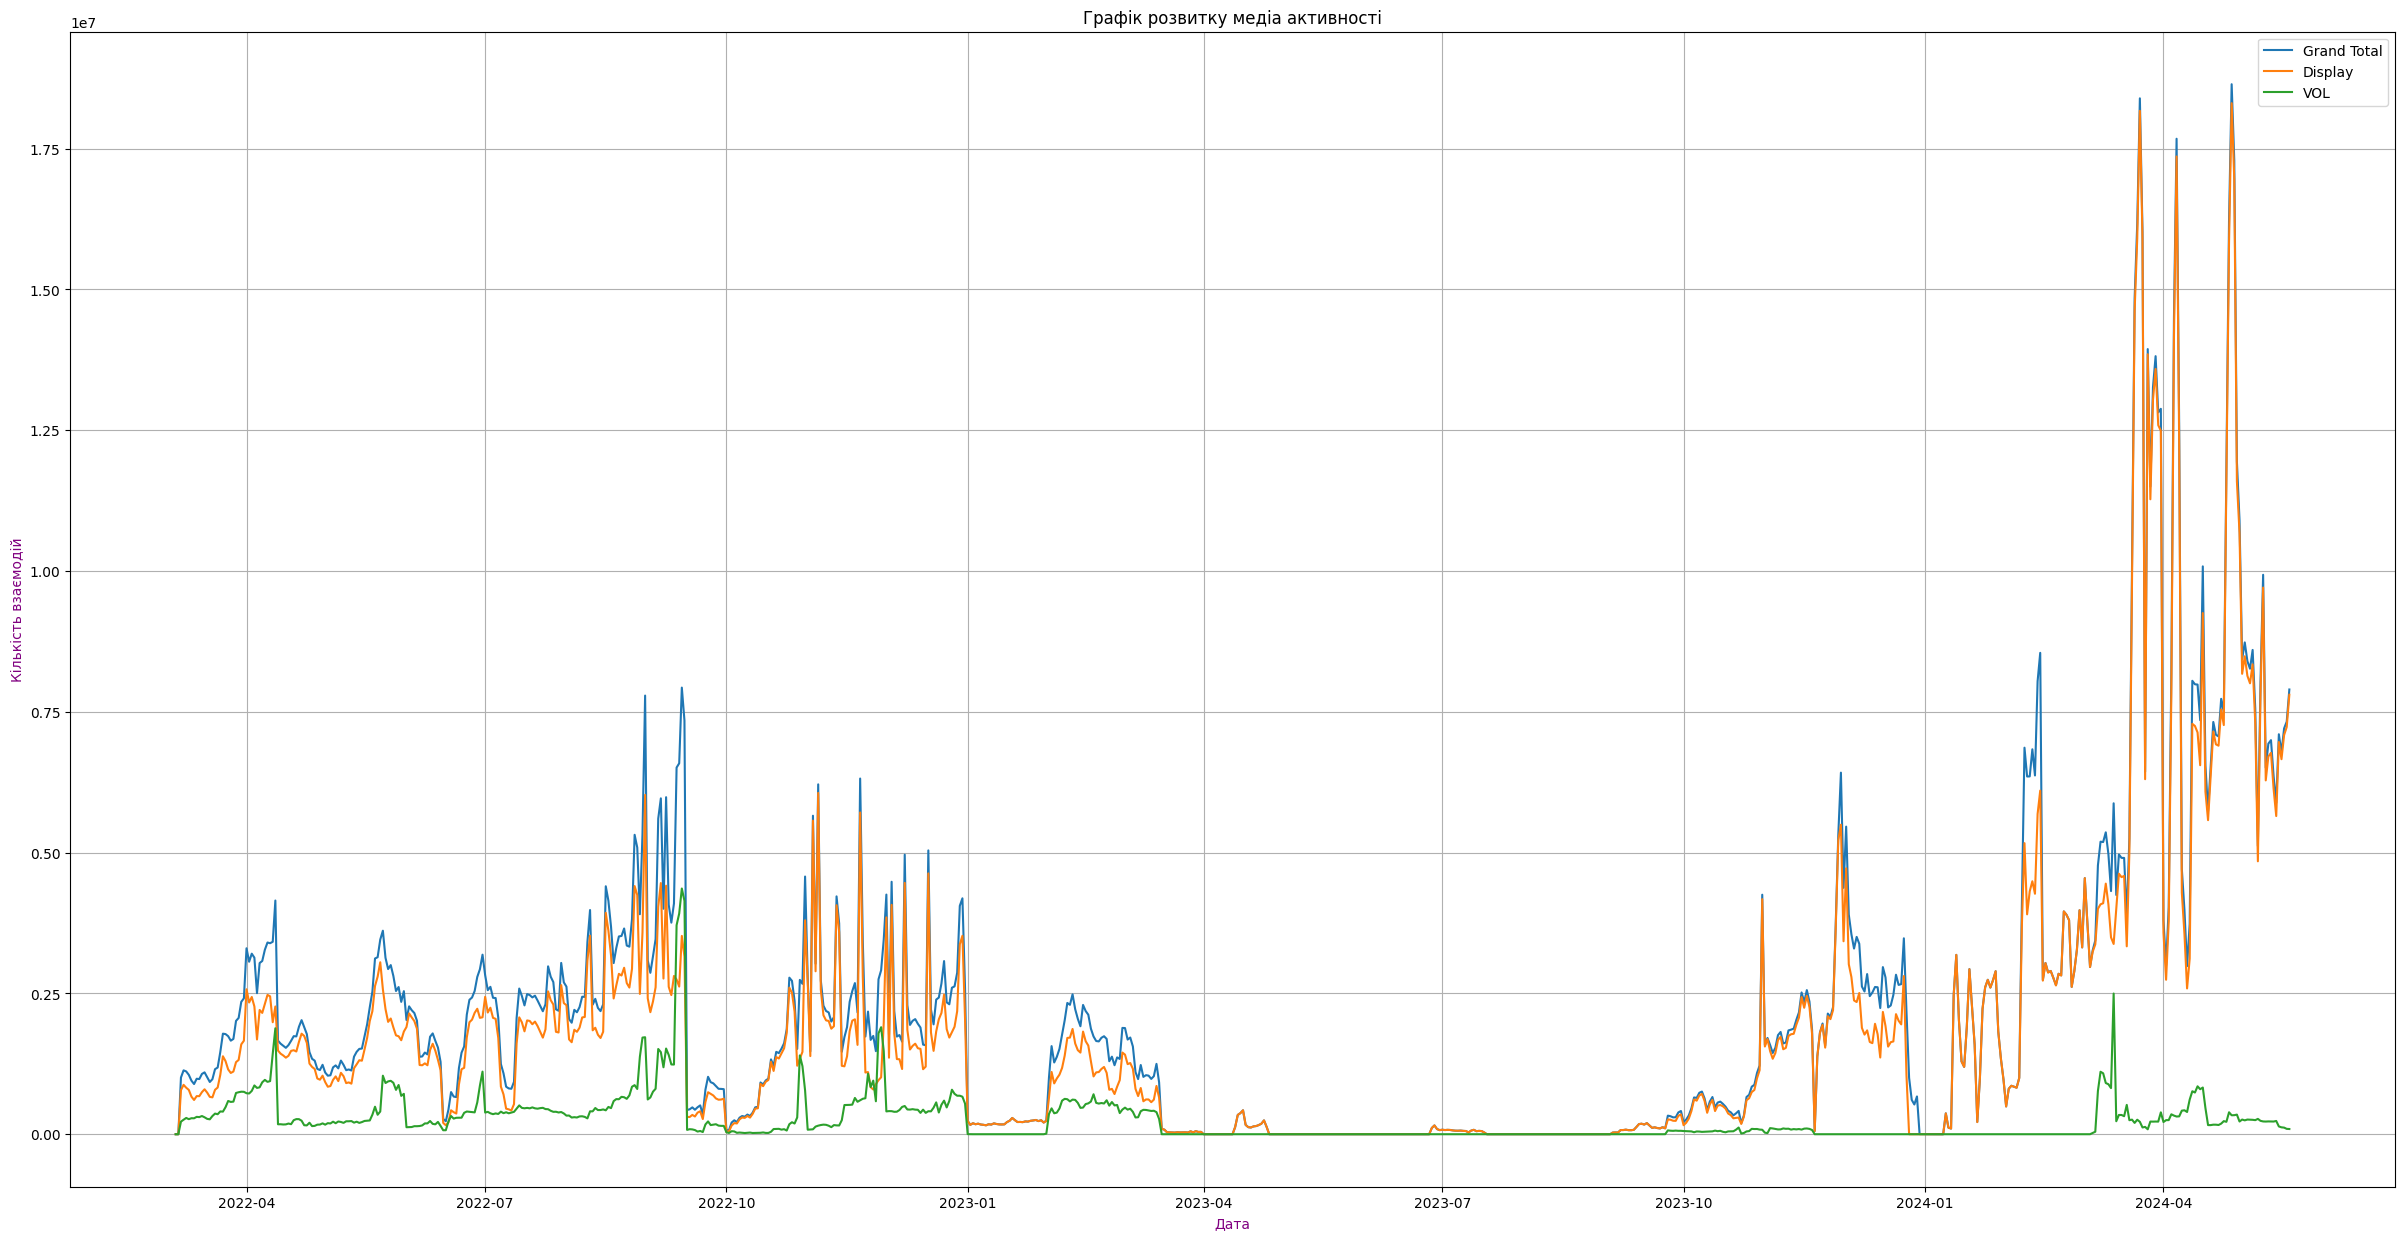

In [44]:
plt.figure(figsize=(30, 15))
plt.plot(media["PIVOT_DATE"], media["Grand Total"], label="Grand Total")
plt.plot(media["PIVOT_DATE"], media["Display"], label="Display")
plt.plot(media["PIVOT_DATE"], media["VOL"], label="VOL")

plt.title(f"Графік розвитку медіа активності")
plt.xlabel("Дата", color="purple")
plt.ylabel("Кількість взаємодій", color="purple")

plt.legend()
plt.grid()
plt.show()

Бачимо, що кількість взаємодій в період з 4 місяця (квітень) 2022 по кінець 9 місяця (вересень) 2022 часто змінюється: спостерігається сезонність (то спадає, то зростає), але, загально, кількість взаємодій зростає до середини 2022-09 (тренд).
Далі відбувся різкий спад показників (з середини 9 місяця по 11 місяць 2022). З 2022-11 по 2023-01 взаємодії знову зросли, а з 2023-01 по 2023-02 були стабільно на низькому рівні. В період 3го місяця (березень) 2023 було відносне збільшення взаємодій, після чого, на довгий період, з середини 2023-03 по 2023-11, взаємодії впали і були стабільно на низькому, майже однаковому, рівні.
В період з 11 місяця (листопад) 2023 і аж до 5 місяця (травень) 2024 року, загально, відбулася досить різка тенденція: показники взаємодії зросли до найбільших за весь період значень. Особливим періодом збільшення слід відмітити 2024-03 -- 2024-05.



---



## 2. Show how channels decomposition vary over time -- how does split in % within media channels change?

In [47]:
df_new

,Item_purchased_count,Price_initial,Discount,Sales_channel,date,Day
0,1,69.0,40.0,Digital,2022-01-01,6
1,1,69.0,20.0,Indirect Retail,2022-01-01,6
2,1,69.0,0.0,Indirect Retail,2022-01-01,6
3,1,69.0,40.0,Digital,2022-01-01,6
4,1,69.0,40.0,Digital,2022-01-01,6
...,...,...,...,...,...,...
607342,1,69.0,15.0,Brand Retail,2024-05-05,7
607343,1,0.0,0.0,Digital,2024-05-05,7
607344,1,39.0,0.0,Brand Retail,2024-05-05,7
607345,1,39.0,0.0,Brand Retail,2024-05-05,7


In [ ]:
channels = df_new.groupby(["date", "Sales_channel"]).agg({
    "Item_purchased_count": "sum",
    "Price_initial": "sum",
    "Discount": "sum"
}).reset_index()

channels

In [66]:
total_sales = channels.groupby("date")["Item_purchased_count"].transform("sum")

# Додавання процентного співвідношення продажів для кожного каналу
channels["Percentage"] = channels["Item_purchased_count"] / total_sales * 100

channels

,date,Sales_channel,Item_purchased_count,Price_initial,Discount,Percentage
0,2022-01-01,Digital,22,1518.0,500.0,57.894737
1,2022-01-01,Indirect Retail,16,1104.0,260.0,42.105263
2,2022-01-02,Brand Retail,60,4140.0,1080.0,37.500000
3,2022-01-02,Digital,32,2208.0,687.6,20.000000
4,2022-01-02,Indirect Retail,68,4692.0,1080.0,42.500000
...,...,...,...,...,...,...
3534,2024-05-04,Digital,22,34.0,0.0,6.984127
3535,2024-05-04,Indirect Retail,213,10448.0,1741.0,67.619048
3536,2024-05-05,Brand Retail,34,1756.0,180.0,32.692308
3537,2024-05-05,Digital,26,0.0,0.0,25.000000


In [69]:
channels.describe()

,date,Item_purchased_count,Price_initial,Discount,Percentage
count,3539,3539.000000,3539.000000,3539.000000,3539.000000
mean,2023-02-25 15:42:22.074032384,167.031365,8916.158237,2649.204507,24.187624
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,0.033434
25%,2022-08-05 00:00:00,28.000000,1442.000000,313.470000,4.226601
50%,2023-02-21 00:00:00,66.000000,3567.000000,810.000000,10.455764
75%,2023-09-14 12:00:00,135.500000,7656.000000,2517.500000,36.534071
max,2024-05-05 00:00:00,2193.000000,171509.000000,47750.400000,93.103448
std,NaN,242.782468,12942.583480,4454.884533,27.774308


In [82]:
percentage = channels.groupby("date").agg({
    "Item_purchased_count": "sum",
    "Price_initial": "sum",
    "Discount": "sum"
}).reset_index()

percentage

,date,Item_purchased_count,Price_initial,Discount
0,2022-01-01,38,2622.0,760.00
1,2022-01-02,160,11040.0,2847.60
2,2022-01-03,526,36034.0,9842.80
3,2022-01-04,510,34970.0,9370.00
4,2022-01-05,568,38912.0,10470.00
...,...,...,...,...
851,2024-05-01,113,4175.0,375.00
852,2024-05-02,659,30191.0,5386.29
853,2024-05-03,740,34417.0,6790.00
854,2024-05-04,315,14764.0,2297.00


In [71]:
channels["Sales_channel"].unique()

array(['Digital', 'Indirect Retail', 'Brand Retail', 'Remote Coach',
       'Events', 'Community Activator'], dtype=object)

In [86]:
digital = channels[channels["Sales_channel"] == "Digital"]
indirect_retail = channels[channels["Sales_channel"] == "Indirect Retail"]
brand_retail = channels[channels["Sales_channel"] == "Brand Retail"]
remote_coach = channels[channels["Sales_channel"] == "Remote Coach"]
events = channels[channels["Sales_channel"] == "Events"]
community_activator = channels[channels["Sales_channel"] == "Community Activator"]


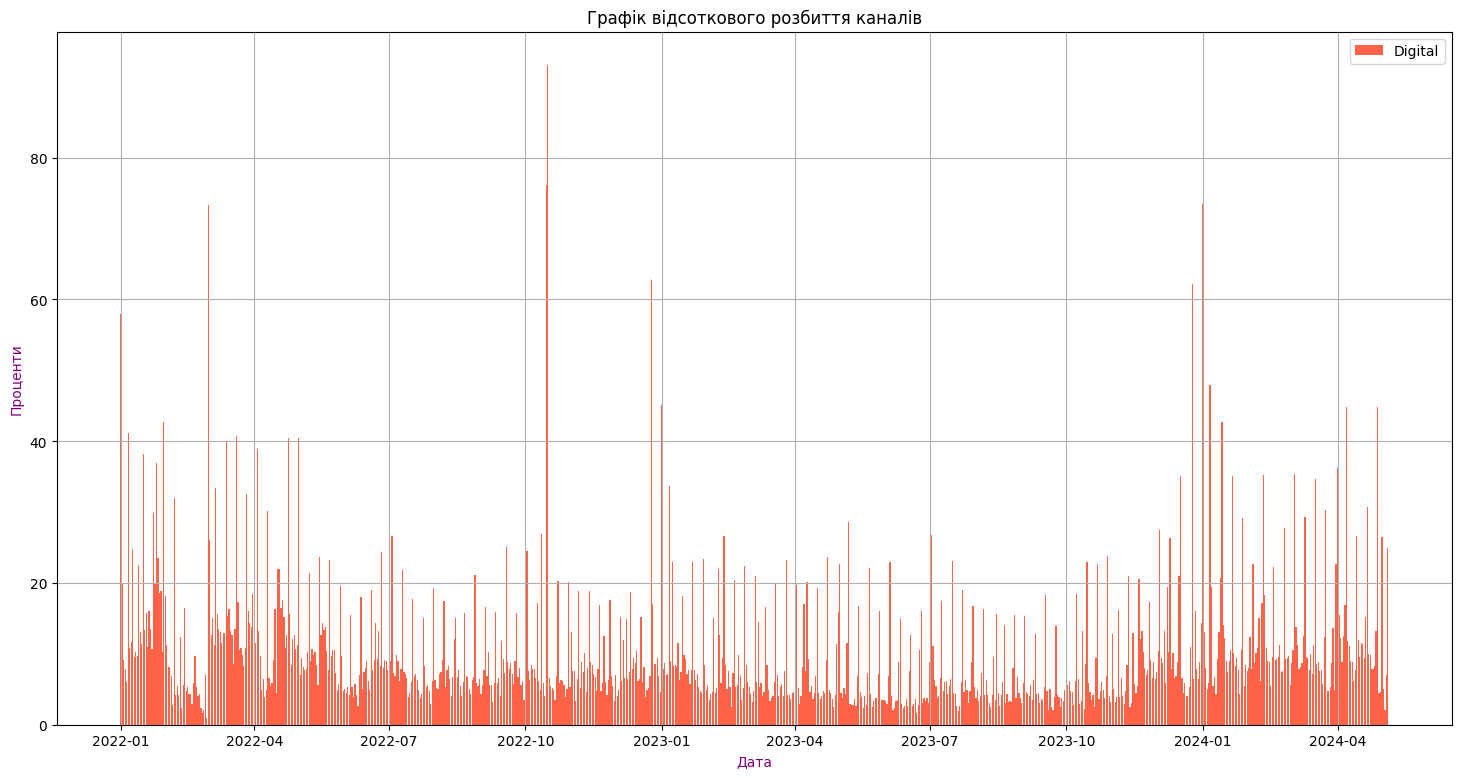

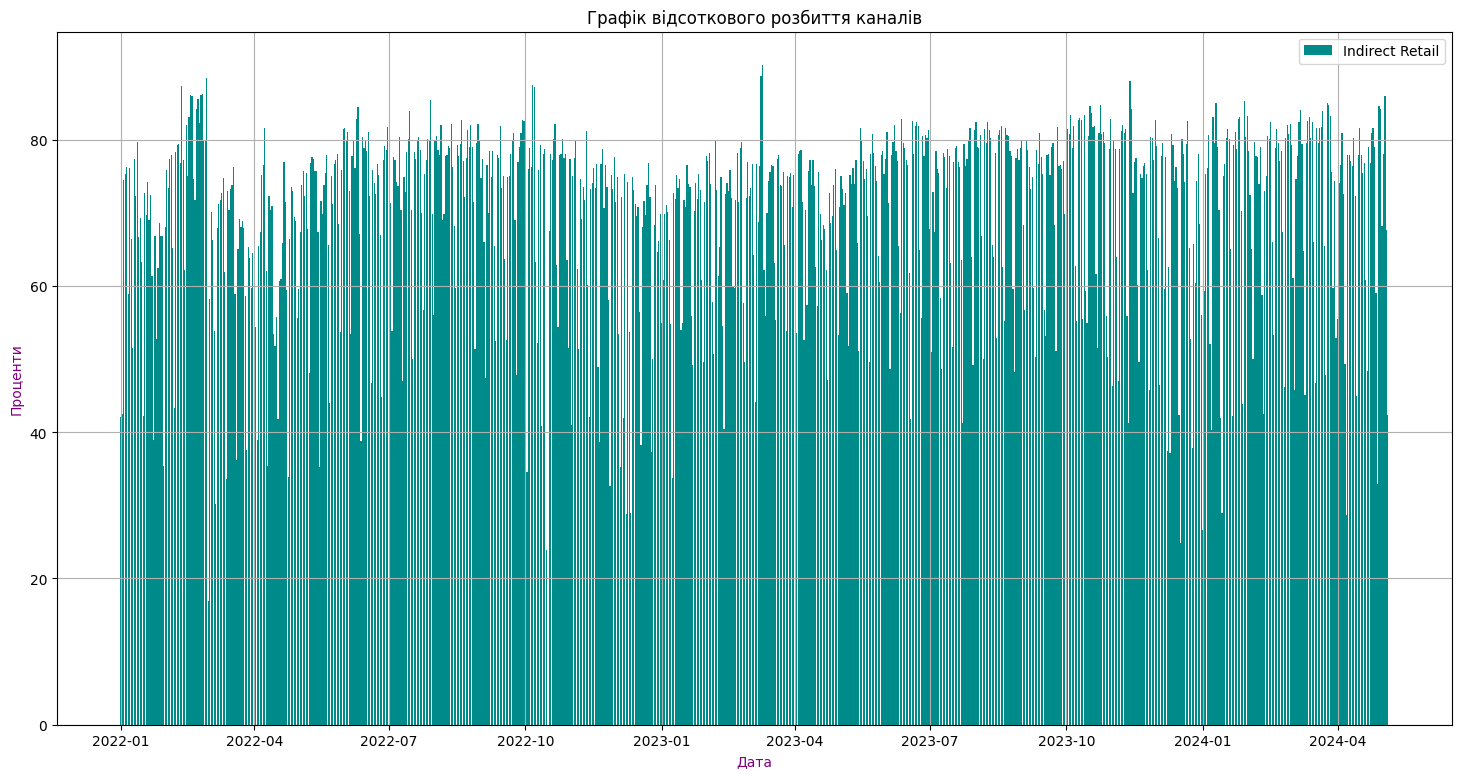

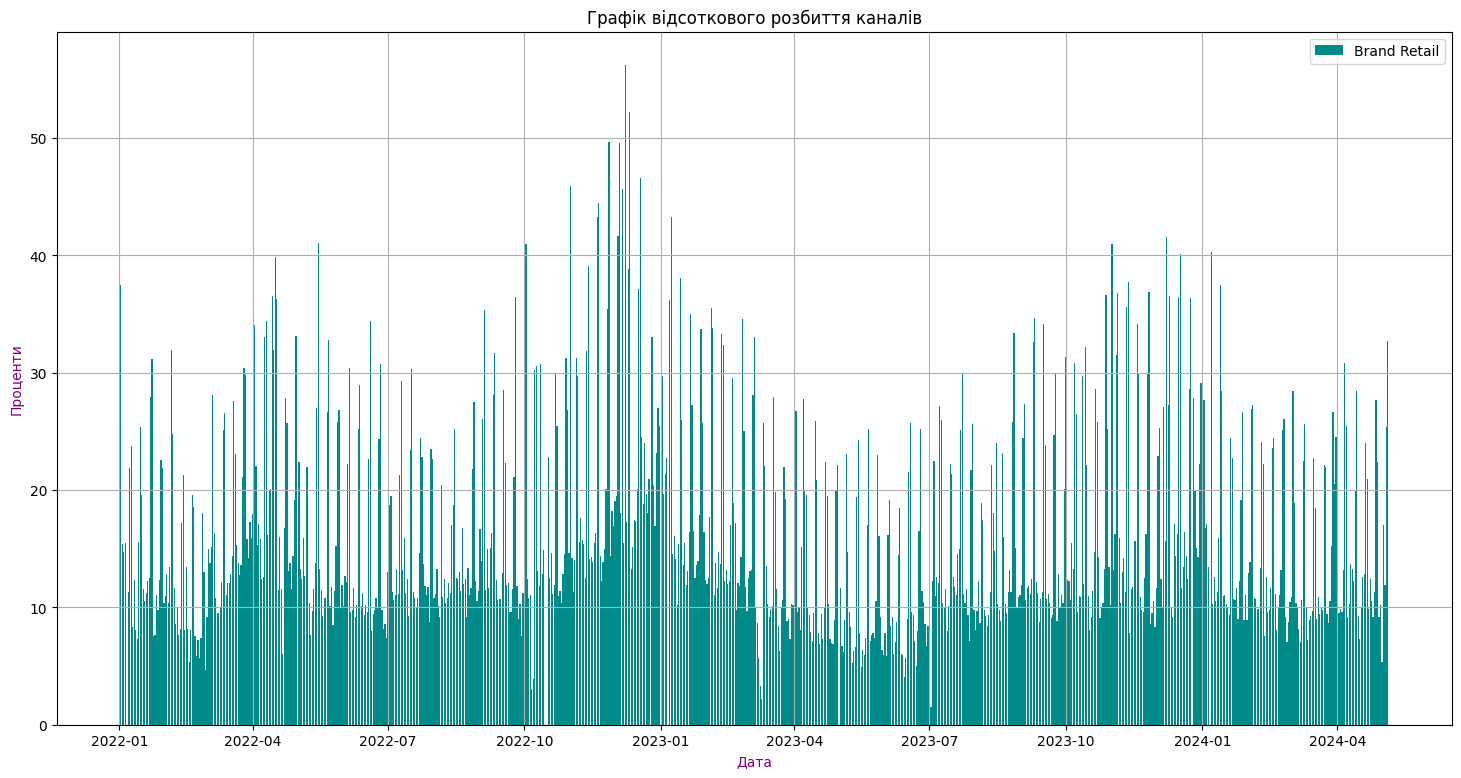

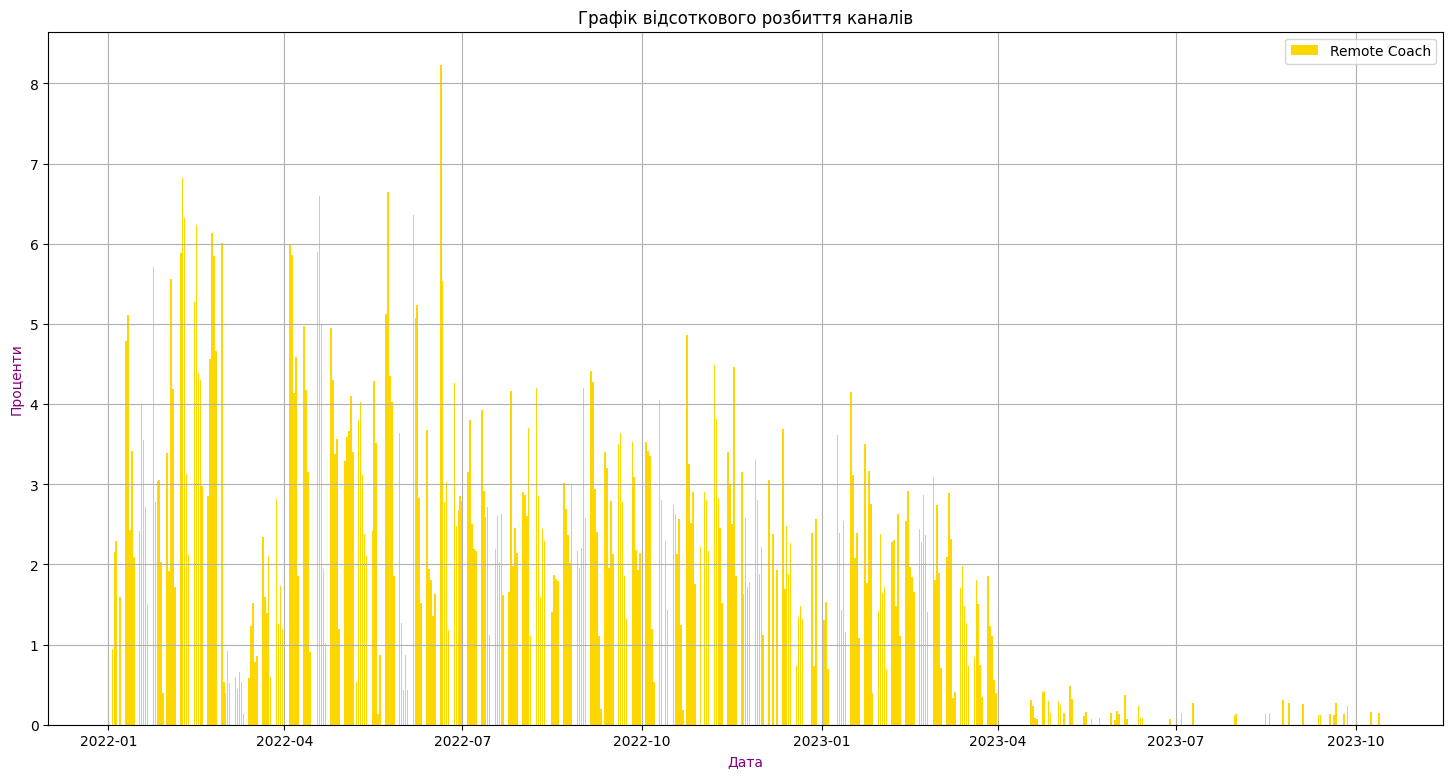

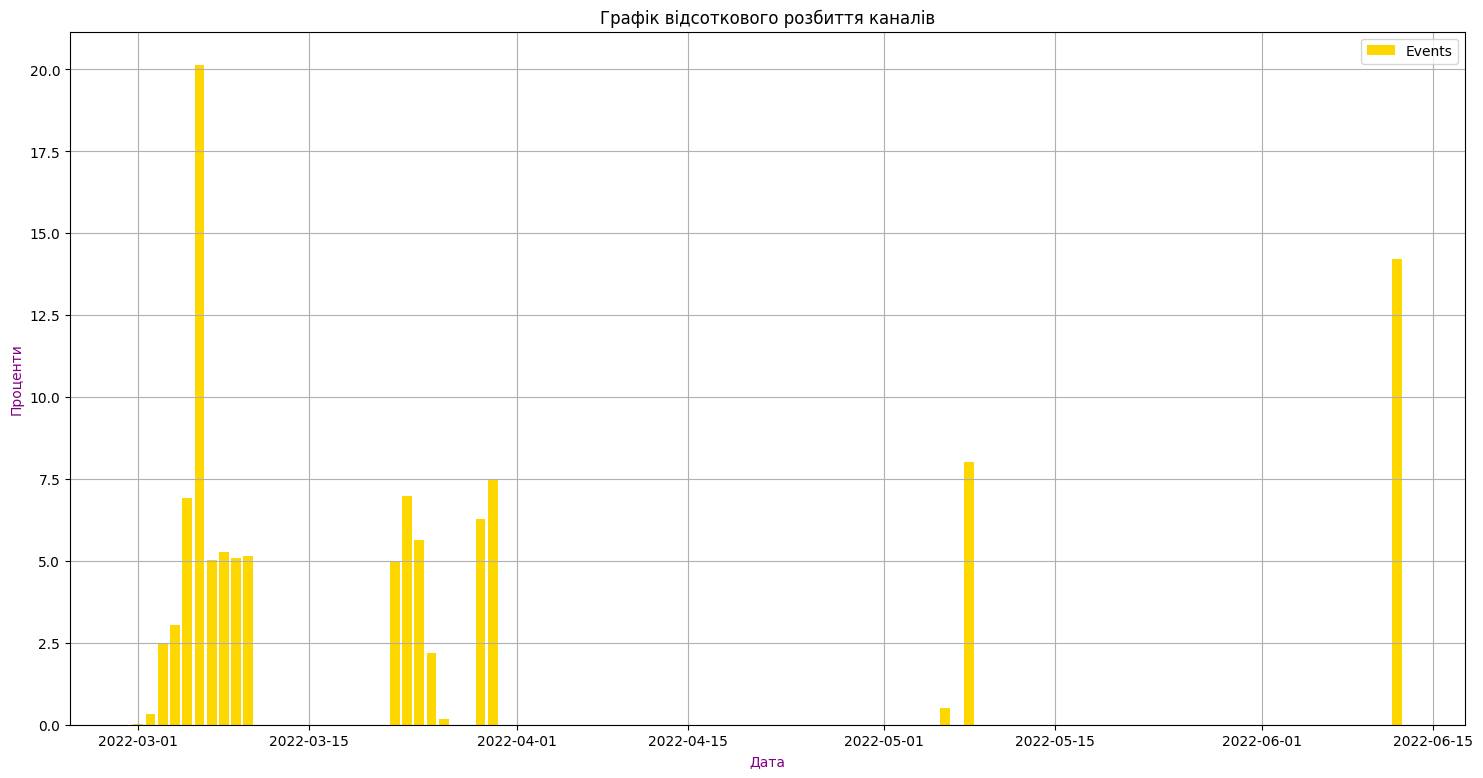

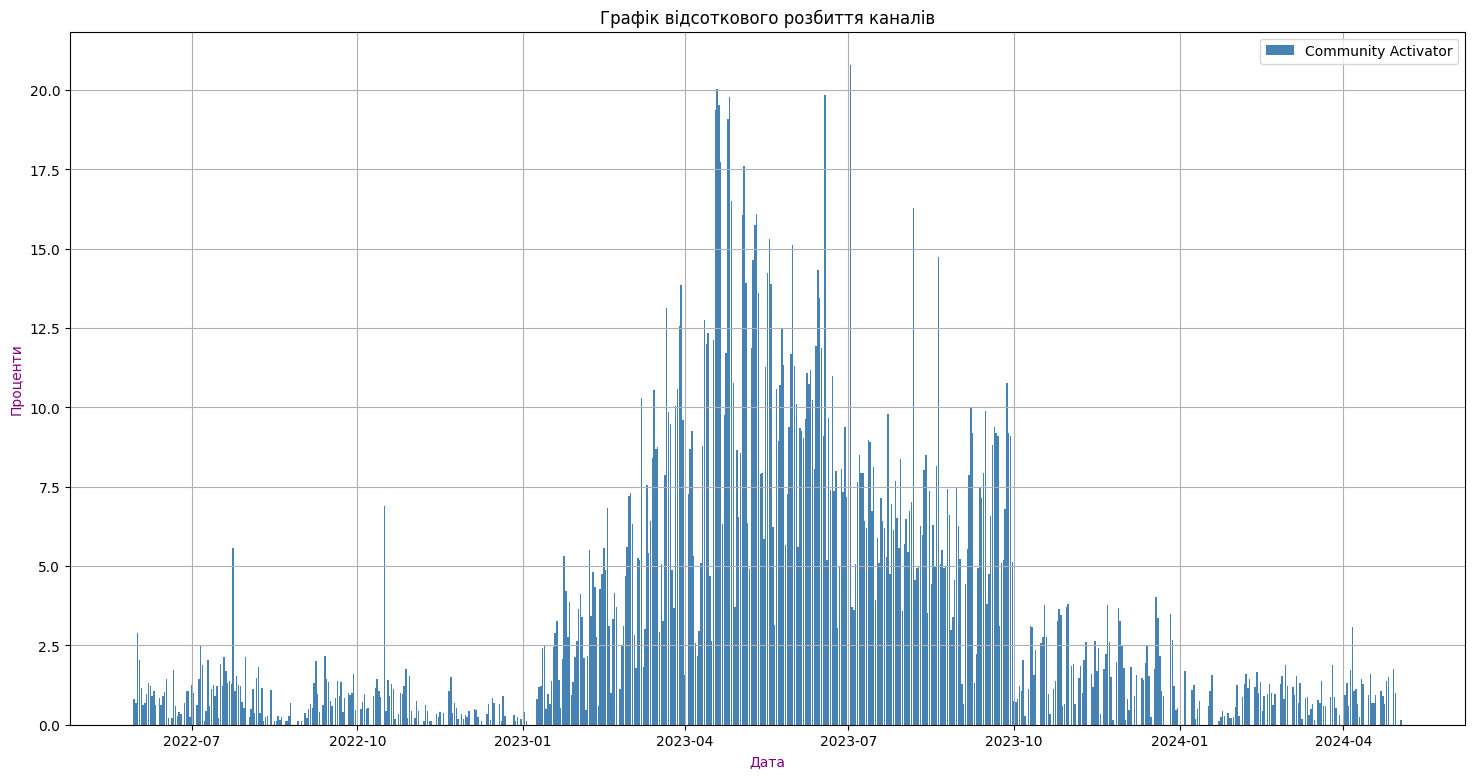

In [101]:
import random


spysok = [digital, indirect_retail, brand_retail, remote_coach, events, community_activator]

for i in spysok:
  plt.figure(figsize=(18, 9))
  plt.bar(i["date"], i["Percentage"], label=i["Sales_channel"].values[0], color=random.choice(["steelblue", "darkcyan", "gold", "tomato"]))

  plt.title(f"Графік відсоткового розбиття каналів")
  plt.xlabel("Дата", color="purple")
  plt.ylabel("Проценти", color="purple")

  plt.legend()
  plt.grid()
  plt.show()

In [102]:
channels

,date,Sales_channel,Item_purchased_count,Price_initial,Discount,Percentage
0,2022-01-01,Digital,22,1518.0,500.0,57.894737
1,2022-01-01,Indirect Retail,16,1104.0,260.0,42.105263
2,2022-01-02,Brand Retail,60,4140.0,1080.0,37.500000
3,2022-01-02,Digital,32,2208.0,687.6,20.000000
4,2022-01-02,Indirect Retail,68,4692.0,1080.0,42.500000
...,...,...,...,...,...,...
3534,2024-05-04,Digital,22,34.0,0.0,6.984127
3535,2024-05-04,Indirect Retail,213,10448.0,1741.0,67.619048
3536,2024-05-05,Brand Retail,34,1756.0,180.0,32.692308
3537,2024-05-05,Digital,26,0.0,0.0,25.000000




---



## ML Part

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder

## Random Forest Regressor

**Random Forest** -- ансамблевий метод машинного навчання для класифікації, регресії та інших завдань, який працює за допомогою побудови численних дерев рішень (decision trees) під час тренування моделі й продукує моду для класів (класифікацій) або усереднений прогноз (регресію) побудованих дерев. Недоліком є схильність до перенавчання.

**Дерево рішень** - це алгоритм машинного навчання, який використовує деревоподібну структуру для розбиття набору даних на менші підмножини. Кожен вузол у дереві представляє один з атрибутів/ознак даних, за якими можна розділити набір даних на дві або більше підмножини.

Вибір Random Forest обумовлюється тим, що ця модель вміє добре визначати складні нелінійні взаємозв'язки між ознаками (розглядаються підмножини ознак, де обираються найбільш значущі), гарно справляється з великим об'ємом даних та може сам працювати з відсутніми значеннями або аномаліяим. Така вражаюча продуктивність відбувається завдяки методу ансамблювання окремих дерев рішень.


Також, через подібність методів, можна використовувати бустінги (Boosting): **LightGBM**, **GradientBoosting**, **XGBoost**.

In [44]:
df_sales

,Item_purchased_count,Price_initial,Discount,Sales_channel,date,Day,week_of_sale,Week,Month,Year
0,1,69.0,40.0,Digital,2022-01-01,6,2022-01-02,52.0,1.0,2021.0
1,1,69.0,20.0,Indirect Retail,2022-01-01,6,2022-01-02,52.0,1.0,2021.0
2,1,69.0,0.0,Indirect Retail,2022-01-01,6,2022-01-02,52.0,1.0,2021.0
3,1,69.0,40.0,Digital,2022-01-01,6,2022-01-02,52.0,1.0,2021.0
4,1,69.0,40.0,Digital,2022-01-01,6,2022-01-02,52.0,1.0,2021.0
...,...,...,...,...,...,...,...,...,...,...
607342,1,69.0,15.0,Brand Retail,2024-05-05,7,2024-05-05,NaN,NaN,NaN
607343,1,0.0,0.0,Digital,2024-05-05,7,2024-05-05,NaN,NaN,NaN
607344,1,39.0,0.0,Brand Retail,2024-05-05,7,2024-05-05,NaN,NaN,NaN
607345,1,39.0,0.0,Brand Retail,2024-05-05,7,2024-05-05,NaN,NaN,NaN


Для прогнозу варото буде дивитися на день тижня (число), місяць, ціну, знижку та канали (так як ми могли спостерігати зміни кожного року, то можна було б і додати рік, проте, це скоріше може вийти зайвим параметром).

In [ ]:
df = df_sales.drop(columns=["Day", "week_of_sale", "Week", "Month", "Year"])
df

In [ ]:
df["Day"] = df["date"].dt.day_of_week
df["Month"] = df["date"].dt.month
df

In [59]:
df.isnull().sum()

,0
Item_purchased_count,0
Price_initial,15821
Discount,15821
Sales_channel,402
date,0
Day,0
Month,0


Так як співвідношення між пустими значеннями та загальною кількістю даних досить мале, можна просто прибрати всі NaN значення.

In [ ]:
to_drop = df[df["Price_initial"].isnull()]
to_drop

In [ ]:
df.drop(to_drop.index, inplace=True)
df

In [62]:
df.isnull().sum()

,0
Item_purchased_count,0
Price_initial,0
Discount,0
Sales_channel,402
date,0
Day,0
Month,0


In [63]:
df.drop(df[df["Sales_channel"].isnull()].index, inplace=True)

In [68]:
df = df.reset_index()
df

,index,Item_purchased_count,Price_initial,Discount,Sales_channel,date,Day,Month
0,0,1,69.0,40.0,Digital,2022-01-01,5,1
1,1,1,69.0,20.0,Indirect Retail,2022-01-01,5,1
2,2,1,69.0,0.0,Indirect Retail,2022-01-01,5,1
3,3,1,69.0,40.0,Digital,2022-01-01,5,1
4,4,1,69.0,40.0,Digital,2022-01-01,5,1
...,...,...,...,...,...,...,...,...
591119,607342,1,69.0,15.0,Brand Retail,2024-05-05,6,5
591120,607343,1,0.0,0.0,Digital,2024-05-05,6,5
591121,607344,1,39.0,0.0,Brand Retail,2024-05-05,6,5
591122,607345,1,39.0,0.0,Brand Retail,2024-05-05,6,5


In [69]:
encoder = OneHotEncoder(sparse=False)
encode_channel = encoder.fit_transform(df[["Sales_channel"]])

encoded_cat = encoder.get_feature_names_out(["Sales_channel"])

df_cat = pd.DataFrame(encode_channel, columns=encoded_cat)

df_cat

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Sales_channel_Brand Retail,Sales_channel_Community Activator,Sales_channel_Digital,Sales_channel_Events,Sales_channel_Indirect Retail,Sales_channel_Remote Coach
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
591119,1.0,0.0,0.0,0.0,0.0,0.0
591120,0.0,0.0,1.0,0.0,0.0,0.0
591121,1.0,0.0,0.0,0.0,0.0,0.0
591122,1.0,0.0,0.0,0.0,0.0,0.0


In [70]:
new = df.join(df_cat)
new

,index,Item_purchased_count,Price_initial,Discount,Sales_channel,date,Day,Month,Sales_channel_Brand Retail,Sales_channel_Community Activator,Sales_channel_Digital,Sales_channel_Events,Sales_channel_Indirect Retail,Sales_channel_Remote Coach
0,0,1,69.0,40.0,Digital,2022-01-01,5,1,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,69.0,20.0,Indirect Retail,2022-01-01,5,1,0.0,0.0,0.0,0.0,1.0,0.0
2,2,1,69.0,0.0,Indirect Retail,2022-01-01,5,1,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1,69.0,40.0,Digital,2022-01-01,5,1,0.0,0.0,1.0,0.0,0.0,0.0
4,4,1,69.0,40.0,Digital,2022-01-01,5,1,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591119,607342,1,69.0,15.0,Brand Retail,2024-05-05,6,5,1.0,0.0,0.0,0.0,0.0,0.0
591120,607343,1,0.0,0.0,Digital,2024-05-05,6,5,0.0,0.0,1.0,0.0,0.0,0.0
591121,607344,1,39.0,0.0,Brand Retail,2024-05-05,6,5,1.0,0.0,0.0,0.0,0.0,0.0
591122,607345,1,39.0,0.0,Brand Retail,2024-05-05,6,5,1.0,0.0,0.0,0.0,0.0,0.0


### Зведення даних до потрібного вигляду

In [73]:
X = new.drop(columns=["index", "Item_purchased_count", "Sales_channel", "date"])
y = new["Item_purchased_count"]

In [74]:
print(f"X_shape: {X.shape}, y_shape: {y.shape}")

X_shape: (591124, 10), y_shape: (591124,)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (472899, 10), y_train: (472899,)
X_test: (118225, 10), y_test: (118225,)


In [76]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [77]:
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)

print(f"MAE: {mae}, MSE: {mse}")

MAE: 0.0, MSE: 0.0


Помилки вийшли нульовими.

## Висновок

*   За результатом навченної моделі абсолютна та середньоквадратична помилки є рівними нулю. Пояснюється це наступним чином:

  1) Таблиця з даними досить зрозуміло зведена: майже на кожен день є продажа, і кожен рядок цільової змінної "y" є одиницею "1". Також зіграв роль метод One Hot Encoding, на основі якого ми правильно і зрозуміло категоризували канали, важливі для аналізу. При такому наборі моделі машинного навчання досить складно помилитися, (хоча і можливий момент перенавчання, і можливість помилки не може бути відхиленою).

  2) Правильно підібрана модель для прогнозування продажей (попиту) Random Forest, яка своїми ансамблевими методами легко справляється з нелінійними та великими або малими даними.

*   За факторні змінні були обрані найважливіші: Виставлена ціна, Знижка, Канали продажей (категоризовані двійковими числами), День, Місяць.

*   Загалом, найпотрібніші та найефективніші змінні були додані до датасету, і якщо додавати інші змінні (може теж важливі, наприклад, з медіа (Grand Total, Display, etc.)), то точно відбудеться перенавчання або сильне відхилення точності церез неоднорідність даних. У нашому результаті, що вийшов, доцільніше було б проаналізувати, які змінні можна прибрати, щоб модель не видавала похибок для нових даних.

*   Факторні змінні, які найбільше впливають на роботу моделі: Канали продажей, День та Ціна.




